# Problem Set 2: RB for Linear Affine Elliptic Problems

### 1. Problem Statement — Design of a Thermal Fin

We consider the problem of designing a thermal fin described in Problem Set 1. In PS1 we looked at some theoretical issues (weak formulation and optimization formulation, convergence of the reduced basis approximation) and derived the necessary reduced basis quantities, i.e., expressions for $ \mathbf{A}_N(\mu) $, $ \mathbf{F}_N $, and $ \mathbf{L}_N $. This problem set is devoted to implementing the reduced basis approximation and solving a simple design problem.

### 2. Reduced Basis Approximation

The point of departure for the reduced basis approximation is a high-dimensional finite element “truth” discretization. In the offline stage, we require the finite element solution to build the reduced basis and we thus also need the FE matrices. In this problem set, we skip the FE assembly step and provide all of the necessary data for use in Python (see Appendix 1).

We saw in class that the reduced basis solution $ u_N(\mu) \in \mathbb{R}^N $ satisfies the set of $ N \times N $ linear equations,

$$ \mathbf{A}_N(\mu) u_N(\mu) = \mathbf{F}_N; $$

and that the output is given by

$$ T_{\text{root},N}(\mu) = \mathbf{L}_N^T u_N(\mu). $$

We derived expressions for $ \mathbf{A}_N(\mu) \in \mathbb{R}^{N \times N} $ in terms of $ \mathbf{A}_N(\mu) $ and $ Z $, $ \mathbf{F}_N \in \mathbb{R}^N $ in terms of $ \mathbf{F}_N $ and $ Z $, and $ \mathbf{L}_N \in \mathbb{R}^N $ in terms of $ \mathbf{L}_N $ and $ Z $; here $ Z $ is an $ N \times N $ matrix, the $ j $th column of which is $ u_N(\mu_j) $ (the nodal values of $ u_{\mathcal{N}}(\mu_j) $). Finally, it follows from affine parameter dependence that $ \mathbf{A}_N(\mu) $ can be expressed as

$$ \mathbf{A}_N(\mu) = \sum_{q=1}^Q \Theta_q(\mu) \mathbf{A}_q^N. $$

The goal is to implement an offline/online version of the reduced-basis method following the computational decomposition indicated below.

#### Offline

- Choose $ N $.
- Choose the sample $ S_N $.
- Construct $ Z $.
- Construct $ \mathbf{A}_q^N, q = 1, \ldots, Q $; $ \mathbf{F}_N $; and $ \mathbf{L}_N $.

#### Online

- Form $ \mathbf{A}_N(\mu) $ from (1.3).
- Solve $ \mathbf{A}_N(\mu) u_N(\mu) = \mathbf{F}_N $.
- Evaluate the output $ T_{\text{root},N}(\mu) $ from (1.2).

The idea is that the offline stage is done only once, generating a small data file with the $ \mathbf{A}_q^N, q = 1, \ldots, Q $, $ \mathbf{F}_N $, and $ \mathbf{L}_N $; the online stage then accesses this data file to provide real-time response to new $ \mu $ queries. For the required offline finite element calculations in this and the following questions, you should first use the coarse triangulation $ T_{h,\text{coarse}} $.

#### Questions

**a.** Show that the operation count for the online stage of your code is independent of $ N $. In particular, show that the operation count (number of floating-point operations) for the online stage, for each new $ \mu $ of interest, can be expressed as

$$ c_1 N^{\gamma_1} + c_2 N^{\gamma_2} + c_3 N^{\gamma_3}, $$

for $ c_1, c_2, c_3, \gamma_1, \gamma_2, \gamma_3 $ independent of $ N $. Give values for the constants $ c_1, c_2, c_3, \gamma_1, \gamma_2, \gamma_3 $.

**1.** We first consider a one-parameter ($ P = 1 $) problem. To this end, we keep the Biot number fixed at $ \text{Bi} = 0.1 $ and assume that the conductivities of all fins are equivalent, i.e., $ k_1 = k_2 = k_3 = k_4 $, but are allowed to vary between 0.1 and 10 – we thus have $ \mu \in D = [0.1, 10] $. The sample set $ S_N $ for $ N_{\text{max}} = 8 $ is given by log equidistributed sampling.

**2.** Generate the reduced basis “matrix” $ Z $ and all necessary reduced basis quantities. You have two options: you can use the solution "snapshots" directly in $ Z $ or perform a Gram-Schmidt orthonormalization to construct $ Z $ (Note that you require the $ X $ – inner product to perform Gram-Schmidt; here, we use $ (\cdot, \cdot)_X = a(\cdot, \cdot; \mu) $, where $ \mu = 1 $ – all conductivities are 1 and the Biot number is 0.1). Calculate the condition number of $ \mathbf{A}_N(\mu) $ for $ N = 8 $ and for $ \mu = 1 $ and $ \mu = 10 $ with and without Gram-Schmidt orthonormalization. What do you observe? Solve the reduced basis approximation (where you use the snapshots directly in $ Z $) for $ \mu_1 = 0.1 $ and $ N = 8 $. What is $ u_N(\mu_1) $? How do you expect $ u_N(\mu_2) $ to look like for $ \mu_2 = 10.0 $? What about $ \mu_3 = 1.0975 $? Solve the Gram-Schmidt orthonormalized reduced basis approximation for $ \mu_1 = 0.1 $ and $ \mu_2 = 10 $ for $ N = 8 $. What do you observe? Can you justify the result? For the remaining questions, you should use the Gram-Schmidt orthonormalized reduced basis approximation.

**a.** Verify that, for $ \mu = 1.5 $ (recall that Biot is still fixed at 0.1) and $ N = 8 $, the value of the output is $ T_{\text{root},N}(\mu) = 1.53107 $.

**b.** We next introduce a regular test sample, $ \Xi_{\text{test}} \subset D $, of size $ n_{\text{test}} = 100 $ (in Python you can simply use `linspace(0.1, 10, 100)` to generate $ \Xi_{\text{test}} $). Plot the convergence of the maximum relative error in the energy norm $ \max_{\mu \in \Xi_{\text{test}}} \frac{|||u(\mu) - u_N(\mu)|||_\mu}{|||u(\mu)|||_\mu} $ and the maximum relative output error $ \max_{\mu \in \Xi_{\text{test}}} \frac{|T_{\text{root}}(\mu) - T_{\text{root},N}(\mu)|}{T_{\text{root}}(\mu)} $ as a function of $ N $ (use the Python command `semilogy` for plotting).

**c.** Compare the average CPU time over the test sample required to solve the reduced basis online stage with direct solution of the FE approximation as a function of $ N $.

**d.** What value of $ N $ do you require to achieve a relative accuracy in the output of 1%? What savings in terms of CPU time does this percentage correspond to?

**e.** Solve problems b) 3. to 5. using the medium and fine FE triangulation. Is the dependence on $ N $ as you would anticipate?

**3.** We now consider another one-parameter ($ P = 1 $) problem. This time, we assume that the conductivities are fixed at $ \{k_1, k_2, k_3, k_4\} = \{0.4, 0.6, 0.8, 1.2\} $, and that only the Biot number, $ \text{Bi} $, is allowed to vary from 0.01 to 1. The sample set $ S_N $ for $ N_{\text{max}} = 11 $ is given by log equidistributed sampling. Generate an orthonormal $ Z $ from the sample set using the medium triangulation.

**a.** Verify that, for $ \mu_0 = 0.4, 0.6, 0.8, 1.2, 0.15 $, i.e., $ \text{Bi} = 0.15 $, the value of the output is $ T_{\text{root},N}(\mu_0) = 1.53 $.

**b.** We next introduce a regular test sample, $ \Xi_{\text{test}} \subset D $, of size $ n_{\text{test}} = 100 $ (in Python you can simply use `linspace(0.01, 1, 100)` to generate $ \Xi_{\text{test}} $). Plot the convergence of the maximum relative error in the energy norm $ \max_{\mu \in \Xi_{\text{test}}} \frac{|||u(\mu) - u_N(\mu)|||_\mu}{|||u(\mu)|||_\mu} $ and the maximum relative output error $ \max_{\mu \in \Xi_{\text{test}}} \frac{|T_{\text{root}}(\mu) - T_{\text{root},N}(\mu)|}{T_{\text{root}}(\mu)} $ as a function of $ N $ (use the Python command `semilogy` for plotting).

**c.** The Biot number is directly related to the cooling method; higher cooling rates (higher $ \text{Bi} $) imply lower (better) $ T_{\text{root}} $ but also higher (worse) initial and operational costs. We can thus define (say) a total cost function as

$$ C(\text{Bi}) = \text{Bi} + T_{\text{root}}(\text{Bi}), $$

minimization of which yields an optimal solution. Apply your (online) reduced-basis approximation for $ T_{\text{root},N} $ (that is, replace $ T_{\text{root}}(\text{Bi}) $ in (above) with $ T_{\text{root},N}(\text{Bi}) $) to find the optimal $ \text{Bi} $. Any (simple) optimization procedure suffices for the minimization.

**4.** We consider now a two-parameter ($ P = 2 $) problem where the conductivities are assumed to be equivalent, i.e., $ k_1 = k_2 = k_3 = k_4 $, but are allowed to vary between 0.1 and 10; and the Biot number, $ \text{Bi} $, is allowed to vary from 0.01 to 1. The sample set $ S_N $ for $ N_{\text{max}} = 46 $ is given by the log random sampling. Generate an orthonormal $ Z $ from the sample set using the coarse triangulation.

**5.** We next introduce a regular grid, $ \Xi_{\text{test}} \subset D $, of size $ n_{\text{test}} = 400 $ (a regular $ 20 \times 20 $ grid). Plot the convergence of the maximum relative error in the energy norm $ \max_{\mu \in \Xi_{\text{test}}} \frac{|||u(\mu) - u_N(\mu)|||_\mu}{|||u(\mu)|||_\mu} $ and the maximum relative output error $ \max_{\mu \in \Xi_{\text{test}}} \frac{|T_{\text{root}}(\mu) - T_{\text{root},N}(\mu)|}{T_{\text{root}}(\mu)} $ as a function of $ N $.

**6.** We now consider the POD method and we wish to compare it with the Greedy approximation. To this end, we sample log randomly the parameter space ($ P = 2 $) and take $ n_{\text{train}} = 100 $ samples. Build the POD approximation using these samples as the training set and compare the results with the Greedy approximation. Compute the RIC and the dimension of the POD space ($ N $) such that the RIC is 99% of the total energy. Plot the POD and Greedy convergence of the maximum relative error in the energy norm $ \max_{\mu \in \Xi_{\text{test}}} \frac{|||u(\mu) - u_N(\mu)|||_\mu}{|||u(\mu)|||_\mu} $ and the maximum relative output error $ \max_{\mu \in \Xi_{\text{test}}} \frac{|T_{\text{root}}(\mu) - T_{\text{root},N}(\mu)|}{T_{\text{root}}(\mu)} $ as a function of $ N $.

**7.** Implement the parametrization with respect to $ L $ and $ t $. The reference geometry is the one given by the .geo file and the corresponding $ \hat{L} $ and $ \hat{t} $. Plot the mean temperature $ T_{\text{root}}(\mu) $ as a function $ t \in [0.1, 0.5] $ and the other parameters set to $ k_i = 0.1, L = 2.5, \text{Bi} = 0.1 $.

### Environment

In [1]:
import numpy as np
import scipy as sp
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
from scipy.io import loadmat
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize
from scipy.sparse.linalg import spsolve, eigsh

### Load and plot the triangulation 

In [2]:
grids = loadmat('FE_grid.mat',simplify_cells=True)
print(grids.keys())
coarse_grid = grids['FE_grid']['coarse']
# show the keys in the grid
print(coarse_grid.keys())
print("number of nodes:",coarse_grid['nodes'])
print("number of elements:",coarse_grid['elements'])
x=coarse_grid['coor'][:,0]
y=coarse_grid['coor'][:,1]
z=np.sin(np.pi*x)*np.cos(np.pi*y)
# be careful  the indices must start at 0, in mat files they start at one, so substract 1
triangles=np.concatenate(coarse_grid['theta'][0:5]-1)
T=tri.Triangulation(x,y,triangles)

dict_keys(['__header__', '__version__', '__globals__', 'FE_grid'])
dict_keys(['nodes', 'coor', 'elements', 'theta'])
number of nodes: 1333
number of elements: 2095


### Plot the mesh

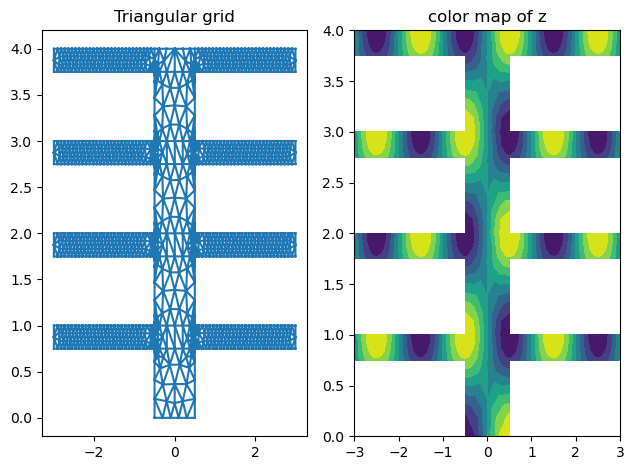

In [3]:
def plot(mesh,u):
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs = axs.flatten()

    # Plot the triangulation.
    axs[0].triplot(mesh)
    axs[0].set_title('Triangular grid')

    # Plot the color map.
    axs[1].tricontourf(mesh,u)
    axs[1].set_title('color map of z')
    fig.tight_layout()
    plt.show()
plot(T,z)

**1.** We first consider a one-parameter ($ P = 1 $) problem. To this end, we keep the Biot number fixed at $ \text{Bi} = 0.1 $ and assume that the conductivities of all fins are equivalent, i.e., $ k_1 = k_2 = k_3 = k_4 $, but are allowed to vary between 0.1 and 10 – we thus have $ \mu \in D = [0.1, 10] $. The sample set $ S_N $ for $ N_{\text{max}} = 8 $ is given by log equidistributed sampling.


### Load The Finite Element Matrix 

In [4]:
FE_matrix = loadmat('FE_matrix.mat',simplify_cells=True)
print(FE_matrix.keys())
coarse_Mat = FE_matrix['FE_matrix']['coarse']
# show the keys in the grid
print(coarse_Mat.keys())
# Afficher les matrices disponibles
print("Ahq matrix:")
print(coarse_Mat['Ahq'])

dict_keys(['__header__', '__version__', '__globals__', 'FE_matrix'])
dict_keys(['Ahq', 'Fh'])
Ahq matrix:
[<1333x1333 sparse matrix of type '<class 'numpy.float64'>'
 	with 1508 stored elements in Compressed Sparse Column format>
 <1333x1333 sparse matrix of type '<class 'numpy.float64'>'
 	with 1508 stored elements in Compressed Sparse Column format>
 <1333x1333 sparse matrix of type '<class 'numpy.float64'>'
 	with 1508 stored elements in Compressed Sparse Column format>
 <1333x1333 sparse matrix of type '<class 'numpy.float64'>'
 	with 1412 stored elements in Compressed Sparse Column format>
 <1333x1333 sparse matrix of type '<class 'numpy.float64'>'
 	with 2379 stored elements in Compressed Sparse Column format>
 <1333x1333 sparse matrix of type '<class 'numpy.float64'>'
 	with 1693 stored elements in Compressed Sparse Column format>]


### Load Reduce Basis Sample

In [5]:
mu_samples = loadmat('RB_sample.mat',simplify_cells=True)
print(mu_samples["RB_sample"].keys())
mu_samples1 = mu_samples['RB_sample']['sample1'] 
print(mu_samples1)

dict_keys(['sample1', 'sample2', 'sample3'])
[ 0.1        10.          0.19179103  3.94420606  0.12618569  0.38535286
  2.15443469  0.10974988]


In [6]:
# Definde a function take parameter $\mu$ and return a vector of size six
def theta(mu):
    return np.array([mu,mu,mu,mu,1,0.1])

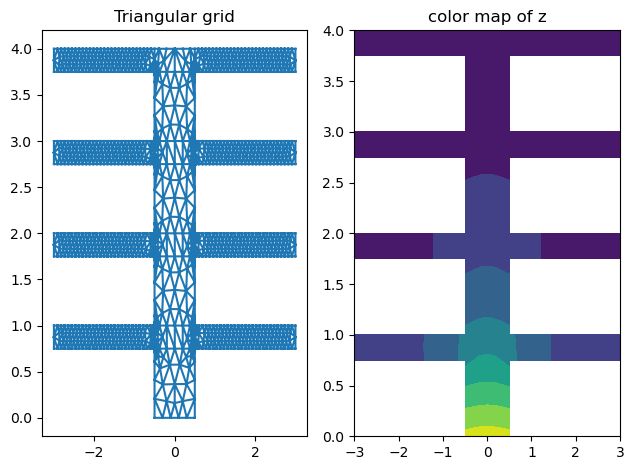

In [7]:
# Assembly of the matrix A with the given mu and the matrix Aq
def assemblage(mu,Aq):
    A = csc_matrix(mu[0]*Aq[0])
    for i in range(1,6):
        A += mu[i]*Aq[i]
    return A
# Store the solution for each mun utilisant les premières (N)
Solution = {}
for n in mu_samples1:
    theta_n = theta(n)
    A = assemblage(theta_n,coarse_Mat['Ahq']).tocsc()
    U = spsolve(csc_matrix(A),coarse_Mat['Fh'])
    Solution[n] = U
# Plot the solution for the first any mu
T=tri.Triangulation(x,y,triangles)
plot(T,Solution[mu_samples1[6]])

#### 2. Generate the reduced basis “matrix” $Z$ and all necessary reduced basis quantities. You have two options: you can use the solution "snapshots" directly in $Z$ or perform a Gram-Schmidt orthonormalization to construct $Z$ (Note that you require the $X$ – inner product to perform Gram-Schmidt; here, we use $(\cdot, \cdot)_X = a(\cdot, \cdot; \mu)$, where $\mu = 1$ – all conductivities are 1 and the Biot number is 0.1).


To answer this question, we start by defining the matrix of snapshots and orthogonalizing it using the Gram-Schmidt process

In [8]:
N = 8
# Generate the snapshots of the solution
def Z_matrix(N,Aq,sample,Fh):
    Z = []
    for i in range(0,N):
        mu = theta(sample[i])
        A = assemblage(mu,Aq)
        Z_i = spsolve(csc_matrix(A),Fh)
        Z.append(Z_i)
    return np.array(Z).T
Z = Z_matrix(N,coarse_Mat['Ahq'],mu_samples1,coarse_Mat['Fh'])
print(Z.shape)
print(A.shape)


(1333, 8)
(1333, 1333)


In [9]:
# Function to apply the orthogonalisation of Gram-Schmidt
def gram_schmidt(Z, M):
    N = Z.shape[1]
    Q = np.zeros_like(Z)
    for n in range(N):
        q = Z[:, n]
        for m in range(n):
            q -= (Q[:, m].T @ M @ Z[:, n]) * Q[:, m]
        q_norm = np.sqrt(q.T @ M @ q)
        Q[:, n] = q / q_norm
    return Q

# Apply the orthogonalisation of Gram-Schmidt
A_1 = assemblage(theta(1),coarse_Mat['Ahq'])
Z_orth = gram_schmidt(Z, A_1)
print(Z_orth.shape)

(1333, 8)


In [10]:
A_1 = assemblage(theta(1),coarse_Mat['Ahq'])

I = Z_orth.T  @ Z_orth
print(I)

[[ 1.06405366e+02  1.26238549e+01  4.31674303e+01 -7.84985649e+00
  -2.17027475e+01  1.51516537e+01 -1.00377916e+01 -7.63145218e+00]
 [ 1.26238549e+01  5.83778330e+01 -2.01422928e+01 -1.42815208e+00
   1.67967838e+00  1.80549869e+00  1.19345385e+00 -1.81867170e+00]
 [ 4.31674303e+01 -2.01422928e+01  5.36840436e+01  1.53920904e+01
  -1.75246633e+01  9.28855211e+00 -1.06820827e+00  1.06185169e-01]
 [-7.84985649e+00 -1.42815208e+00  1.53920904e+01  4.32853357e+01
   1.71257041e+01 -7.11061425e-01  1.86553845e+01  7.78470508e+00]
 [-2.17027475e+01  1.67967838e+00 -1.75246633e+01  1.71257041e+01
   3.94415885e+01 -2.00331659e+01  2.19199123e+01  8.43094752e+00]
 [ 1.51516537e+01  1.80549869e+00  9.28855211e+00 -7.11061425e-01
  -2.00331659e+01  2.60163081e+01 -6.54519546e+00 -9.98738060e+00]
 [-1.00377916e+01  1.19345385e+00 -1.06820827e+00  1.86553845e+01
   2.19199123e+01 -6.54519546e+00  4.30403458e+01  1.36783436e+01]
 [-7.63145218e+00 -1.81867170e+00  1.06185169e-01  7.78470508e+00
   

#### Calculate the condition number of $\mathbf{A}_N(\mu)$ for $N = 8$ and for $\mu = 1$ and $\mu = 10$ with and without Gram-Schmidt orthonormalization.

In [11]:
# Calculate the condition number of the matrix A
def condition_number(A):
    A_dense = A.toarray() if hasattr(A, 'toarray') else A
    eigenvalues = np.linalg.eigvals(A_dense)
    return np.max(np.abs(eigenvalues)) / np.min(np.abs(eigenvalues))



In [12]:
# Calculate the condition number of the matrix A_1 and A_10 without orthogonalisation
A_1 = assemblage(theta(1),coarse_Mat['Ahq'])
A_10 = assemblage(theta(10),coarse_Mat['Ahq'])
A_N_1 = Z.T @ A_1 @ Z
A_N_10 = Z.T @ A_10 @ Z
print("Condition number of A_1:",condition_number(A_1))
print("Condition number of A_10:",condition_number(A_10))



Condition number of A_1: 2610.5445673995
Condition number of A_10: 20717.136172014747


In [13]:
# Calculate the condition number of the matrix A_1 and A_10 with orthogonalisation
A_N_1_orth = Z_orth.T @ A_1 @ Z_orth
A_N_10_orth = Z_orth.T @ A_10 @ Z_orth
print("Condition number of A_1 with orthogonalisation:",condition_number(A_N_1_orth))
print("Condition number of A_10 with orthogonalisation:",condition_number(A_N_10_orth))

Condition number of A_1 with orthogonalisation: 1.0000000003476885
Condition number of A_10 with orthogonalisation: 9.928605814080193


#### What do you observe?

We observe that, the condtionnement of the matrix is very small with orthogonalisation

#### Solve the reduced basis approximation (where you use the snapshots directly in $Z$) for $\mu_1 = 0.1$ and $N = 8$. What is $u_N(\mu_1)$?

In [14]:
# Solve the reduced basis problem
def reduced_basis_solution(mu, Aq, Fh, Z):
    theta_mu = theta(mu)
    A_N_mu = Z.T @ assemblage(theta_mu, Aq) @ Z
    F_N = Z.T @ Fh
    u_N_mu = spsolve(A_N_mu, F_N)
    T_root_N_mu =  F_N.T @ u_N_mu
    return u_N_mu, T_root_N_mu

In [15]:
# solve the reduced basis approximation for mu = 1 using the snapshots
mu_1 = 0.1
u_N_mu_1,_= reduced_basis_solution(mu_1, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z)
print("u_N(mu_1) using snapshots directly in Z:", u_N_mu_1)

u_N(mu_1) using snapshots directly in Z: [ 1.00000000e+00  5.33073221e-15  7.14525130e-15  1.47945510e-14
 -1.02390882e-12 -5.19968357e-13  3.35398820e-12 -3.43620817e-11]


/usr/lib/python3/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


$ u_N(\mu_1) $ is a first vector of basis of $R^8$

#### How do you expect $ u_N(\mu_2) $ to look like for $ \mu_2 = 10.0 $? What about $ \mu_3 = 1.0975 $? Solve the Gram-Schmidt orthonormalized reduced basis approximation for $ \mu_1 = 0.1 $ and $ \mu_2 = 10 $ for $ N = 8 $. What do you observe? Can you justify the result? For the remaining questions, you should use the Gram-Schmidt orthonormalized reduced basis approximation.

In [16]:
# solve the reduced basis approximation for mu = 10 using the snapshots and mu_2 = 10 and mu_3 = 1.0975
mu_2 = 10.0
mu_3 = 1.0975
u_N_mu_2,_ = reduced_basis_solution(mu_2, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z)
u_N_mu_3,_ = reduced_basis_solution(mu_3, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z)
print("u_N(mu_2) using snapshots directly in Z:", u_N_mu_2)
print("u_N(mu_3) using snapshots directly in Z:", u_N_mu_3)

u_N(mu_2) using snapshots directly in Z: [ 3.85338591e-01  1.00000000e+00  3.73419166e-15  1.09160320e-14
 -2.98021876e-14 -1.63227794e-14 -2.04333207e-12 -5.80181868e-11]
u_N(mu_3) using snapshots directly in Z: [ 0.53909967  0.76576632  1.08234322  2.25150496 -2.44514619  1.27919491
  1.76657399 -5.04356974]


In [17]:
# solve the reduced basis approximation for mu = 1 and mu = 10 using the orthogonalised snapshots
u_N_mu_1_orth,_ = reduced_basis_solution(mu_1, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z_orth)
u_N_mu_2_orth,_ = reduced_basis_solution(mu_2, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z_orth)
print("u_N(mu_1) with Gram-Schmidt:", u_N_mu_1_orth)
print("u_N(mu_2) with Gram-Schmidt:", u_N_mu_2_orth)


u_N(mu_1) with Gram-Schmidt: [ 1.91716756e+00 -5.57862033e-15 -7.79714228e-15  1.17417747e-15
 -2.70184763e-15 -7.18064827e-16  1.69574478e-15 -2.97241991e-15]
u_N(mu_2) with Gram-Schmidt: [ 7.38758647e-01  8.77362719e-01 -1.28630703e-15 -7.50452553e-16
  4.18156758e-18 -3.89742927e-16 -8.19475865e-16 -2.23633556e-16]


#### What do you observe?

With the orthonormalized snapshots, we observe that the dominant component of $ u_N(\mu_1) $ is approximately 10, while the other components are negligible. This indicates that the solution is well-conditioned

#### Can you justify the result?

Without Gram-Schmidt: The snapshots are not orthogonal, leading to ill-conditioned matrices $\mathbf{A}_N(\mu)$.

With Gram-Schmidt: The orthonormalization ensures orthogonal reduced bases in $ (\cdot, \cdot)_X$, reducing errors and improving stability.



#### a. Verify that, for $\mu = 1.5$ (recall that Biot is still fixed at 0.1) and $N = 8$, the value of the output is $T_{\text{root},N}(\mu) = 1.53107$.

In [18]:
# Verification of the results for mu = 1.5
m = 1.5
_, T_root_N_mu= reduced_basis_solution(m, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z_orth)
print("T_root_N(mu) for mu = 1.5:", T_root_N_mu)

T_root_N(mu) for mu = 1.5: 1.5310749707896432


#### b. We next introduce a regular test sample, $\Xi_{\text{test}} \subset D$, of size $n_{\text{test}} = 100$ (in Python you can simply use `linspace(0.1, 10, 100)` to generate $\Xi_{\text{test}}$). Plot the convergence of the maximum relative error in the energy norm $\max_{\mu \in \Xi_{\text{test}}} \frac{|||u(\mu) - u_N(\mu)|||_\mu}{|||u(\mu)|||_\mu}$ and the maximum relative output error $\max_{\mu \in \Xi_{\text{test}}} \frac{|T_{\text{root}}(\mu) - T_{\text{root},N}(\mu)|}{T_{\text{root}}(\mu)}$ as a function of $N$ (use the Python command `semilogy` for plotting).



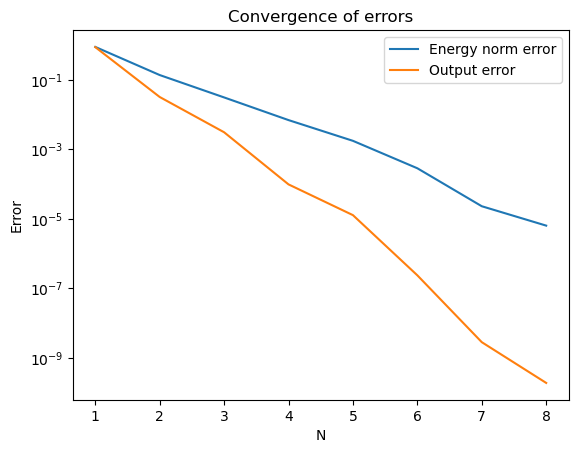

In [19]:
# Generate the test parameters
Xi_test = np.linspace(0.1, 10, 100)

# Calculate the errors for energy norm and output
errors_energy = []
errors_output = []

for n in range(1, N + 1):
    Z_N = Z_matrix(n,coarse_Mat['Ahq'],mu_samples1,coarse_Mat['Fh'])
    Z_orth_N = gram_schmidt(Z_N, assemblage(theta(1),coarse_Mat['Ahq']))
    
    max_error_energy = 0
    max_error_output = 0
    
    for mu in Xi_test:
        #  Compute the reduced basis solution
        u_N_mu, T_root_N_mu = reduced_basis_solution(mu, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z_orth_N)
        # Projection of the solution on the high-dimensional space
        u_N_mu_high_dim = Z_orth_N @ u_N_mu
        
        # Compute the "truth" solution
        A_mu = assemblage(theta(mu), coarse_Mat['Ahq']).tocsc()
        u_mu = spsolve(A_mu, coarse_Mat['Fh'])
        T_root_mu = coarse_Mat['Fh'].T @ u_mu
        
        # Compute the errors
        error_energy = np.linalg.norm(u_mu - u_N_mu_high_dim) / np.linalg.norm(u_mu)
        error_output = np.abs(T_root_mu - T_root_N_mu) / np.abs(T_root_mu)
        
        max_error_energy = max(max_error_energy, error_energy)
        max_error_output = max(max_error_output, error_output)
    
    errors_energy.append(max_error_energy)
    errors_output.append(max_error_output)

# Plot the convergence of the errors
plt.figure()
plt.semilogy(range(1, N + 1), errors_energy, label='Energy norm error')
plt.semilogy(range(1, N + 1), errors_output, label='Output error')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.title('Convergence of errors')
plt.show()

We can see from the figure that the error energy converges to $10^{-4}$ and the output error converges to $10^{-8}$. This indicates that our basis performs well in terms of error reduction.

#### c. Compare the average CPU time over the test sample required to solve the reduced basis online stage with direct solution of the FE approximation as a function of $N$.



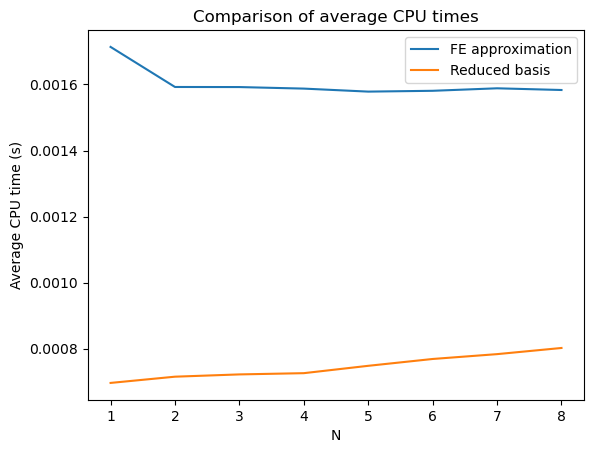

In [20]:
# Generate the test parameters
Xi_test = np.linspace(0.1, 10, 100)

# Mesure the CPU time for the FE approximation and the reduced basis
cpu_times_fe = []
cpu_times_rb = []

for n in range(1, N + 1):
    Z_N = Z_matrix(n, coarse_Mat['Ahq'], mu_samples1, coarse_Mat['Fh'])
    Z_orth_N = gram_schmidt(Z_N, assemblage(theta(1), coarse_Mat['Ahq']))
    
    # Mesure the CPU time for the FE approximation
    start_time = time.time()
    for mu in Xi_test:
        A_mu = assemblage(theta(mu), coarse_Mat['Ahq'])
        u_mu = spsolve(A_mu, coarse_Mat['Fh'])
    end_time = time.time()
    cpu_time_fe = (end_time - start_time) / len(Xi_test)
    cpu_times_fe.append(cpu_time_fe)
    
    # Mesure the CPU time for the reduced basis
    start_time = time.time()
    for mu in Xi_test:
        u_N_mu,_ = reduced_basis_solution(mu, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z_orth_N)
        # Projection of the solution on the high-dimensional space
        # u_N_mu_high_dim = Z_orth_N @ u_N_mu
    end_time = time.time()
    cpu_time_rb = (end_time - start_time) / len(Xi_test)
    cpu_times_rb.append(cpu_time_rb)

# Plot the comparison of the average CPU times
plt.figure()
plt.plot(range(1, N + 1), cpu_times_fe, label='FE approximation')
plt.plot(range(1, N + 1), cpu_times_rb, label='Reduced basis')
plt.xlabel('N')
plt.ylabel('Average CPU time (s)')
plt.legend()
plt.title('Comparison of average CPU times')
plt.show()

From the figure, we can see that using the reduced basis significantly reduces the computation time for calculating the solution. This is a notable advantage of the reduced basis method.

#### d. What value of $N$ do you require to achieve a relative accuracy in the output of 1%? What savings in terms of CPU time does this percentage correspond to?


In [21]:
# Calculate the required N for a target accuracy of 1%
target_accuracy = 0.01
N_required = next(n for n, error in enumerate(errors_output, start=1) if error <= target_accuracy)

# Compute the CPU time for the FE approximation and the reduced basis for the required N
cpu_time_fe_required = cpu_times_fe[N_required - 1]
cpu_time_rb_required = cpu_times_rb[N_required - 1]
cpu_time_savings = cpu_time_fe_required - cpu_time_rb_required

# Print the results
print(f"Value of N required for 1% accuracy: {N_required}")
print(f"CPU time for FE approximation: {cpu_time_fe_required:.6e} seconds")
print(f"CPU time for reduced basis: {cpu_time_rb_required:.6e} seconds")
print(f"CPU time savings: {cpu_time_savings:.6e} seconds")

Value of N required for 1% accuracy: 3
CPU time for FE approximation: 1.592143e-03 seconds
CPU time for reduced basis: 7.224083e-04 seconds
CPU time savings: 8.697343e-04 seconds


The reduced basis method is faster than the FE approximation by 2.311707e-07 seconds.

#### e. Solve problems b) 3. to 5. using the medium and fine FE triangulation. Is the dependence on $N$ as you would anticipate?

##### Using the medium FE triangulation

In [22]:
grids = loadmat('FE_grid.mat',simplify_cells=True)
print(grids.keys())
medium_grid = grids['FE_grid']['medium']
# show the keys in the grid
print(medium_grid.keys())
print("number of nodes:",medium_grid['nodes'])
print("number of elements:",medium_grid['elements'])
x=medium_grid['coor'][:,0]
y=medium_grid['coor'][:,1]
z=np.sin(np.pi*x)*np.cos(np.pi*y)
# be careful  the indices must start at 0, in mat files they start at one, so substract 1
triangles=np.concatenate(medium_grid['theta'][0:5]-1)
T=tri.Triangulation(x,y,triangles)

dict_keys(['__header__', '__version__', '__globals__', 'FE_grid'])
dict_keys(['nodes', 'coor', 'elements', 'theta'])
number of nodes: 4760
number of elements: 8380


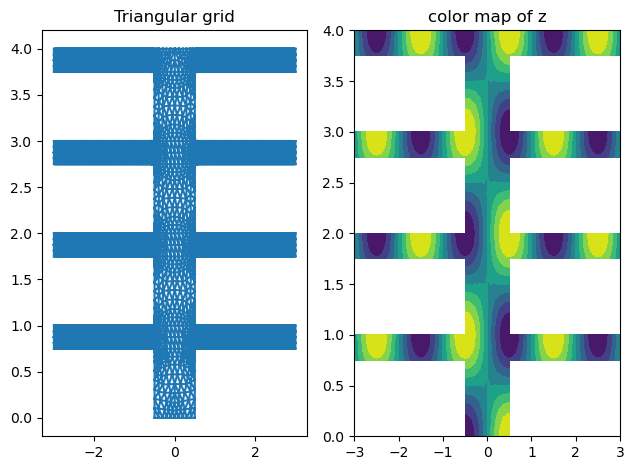

In [23]:
def plot(mesh,u):
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs = axs.flatten()

    # Plot the triangulation.
    axs[0].triplot(mesh)
    axs[0].set_title('Triangular grid')

    # Plot the color map.
    axs[1].tricontourf(mesh,u)
    axs[1].set_title('color map of z')
    fig.tight_layout()
    plt.show()
plot(T,z)

In [24]:
mu_samples = loadmat('RB_sample.mat',simplify_cells=True)
print(mu_samples["RB_sample"].keys())
mu_samples2 = mu_samples['RB_sample']['sample2'] 
print(mu_samples2)

dict_keys(['sample1', 'sample2', 'sample3'])
[0.01       1.         0.0191791  0.28480359 0.09326033 0.62802914
 0.01261857 0.83021757 0.05094138 0.17886495 0.43287613]


I used sample2 to complete this part of the exercise to observe the differences.



In [25]:
FE_matrix = loadmat('FE_matrix.mat',simplify_cells=True)
print(FE_matrix.keys())
medium_Mat = FE_matrix['FE_matrix']['medium']
# show the keys in the grid
print(medium_Mat.keys())
# Afficher les matrices disponibles
print("Ahq matrix:")
print(medium_Mat['Ahq'])

dict_keys(['__header__', '__version__', '__globals__', 'FE_matrix'])
dict_keys(['Ahq', 'Fh'])
Ahq matrix:
[<4760x4760 sparse matrix of type '<class 'numpy.float64'>'
 	with 5602 stored elements in Compressed Sparse Column format>
 <4760x4760 sparse matrix of type '<class 'numpy.float64'>'
 	with 5602 stored elements in Compressed Sparse Column format>
 <4760x4760 sparse matrix of type '<class 'numpy.float64'>'
 	with 5602 stored elements in Compressed Sparse Column format>
 <4760x4760 sparse matrix of type '<class 'numpy.float64'>'
 	with 5242 stored elements in Compressed Sparse Column format>
 <4760x4760 sparse matrix of type '<class 'numpy.float64'>'
 	with 9086 stored elements in Compressed Sparse Column format>
 <4760x4760 sparse matrix of type '<class 'numpy.float64'>'
 	with 3385 stored elements in Compressed Sparse Column format>]


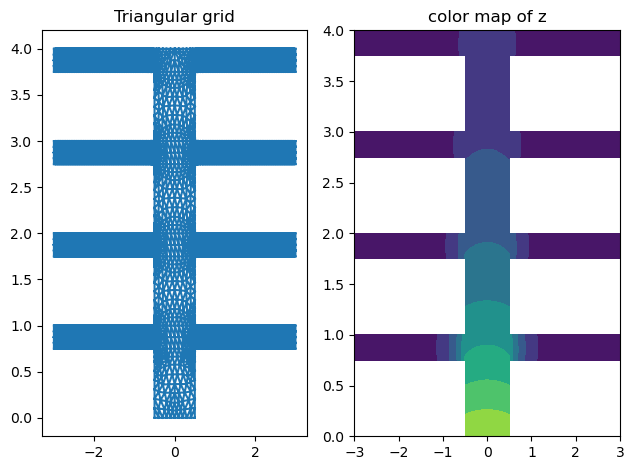

In [26]:
# Store the solution for each mu
N = 11
Solution = {}
for n in mu_samples1:
    theta_n = theta(n)
    A = assemblage(theta_n,medium_Mat['Ahq']).tocsc()
    U = spsolve(csc_matrix(A),medium_Mat['Fh'])
    Solution[n] = U
# Plot the solution for the first any mu
T=tri.Triangulation(x,y,triangles)
plot(T,Solution[mu_samples1[4]])

#### Becarful becouse it take a lot of time to computing the conditon numbre without orthogonalisation

In [27]:
# # Calculate the condition number of the matrix A_1 and A_10 without orthogonalisation
Z = Z_matrix(N,medium_Mat['Ahq'],mu_samples2,medium_Mat['Fh'])
A_1 = assemblage(theta(1),medium_Mat['Ahq'])
A_10 = assemblage(theta(10),medium_Mat['Ahq'])
# A_N_1 = Z.T @ A_1 @ Z
# A_N_10 = Z.T @ A_10 @ Z
# print("Condition number of A_1:",condition_number(A_1))
# print("Condition number of A_10:",condition_number(A_10))



In [28]:
# Calculate the condition number of the matrix A_1 and A_10 with orthogonalisation
Z_orth = gram_schmidt(Z, A_1)
A_N_1_orth = Z_orth.T @ A_1 @ Z_orth
A_N_10_orth = Z_orth.T @ A_10 @ Z_orth
print("Condition number of A_1 with orthogonalisation:",condition_number(A_N_1_orth))
print("Condition number of A_10 with orthogonalisation:",condition_number(A_N_10_orth))

Condition number of A_1 with orthogonalisation: 1.0000000071241895
Condition number of A_10 with orthogonalisation: 9.984141167124044


After the orthogonalization, we immediately achieve a significant improvement in the condition of the matrix.

In [29]:
# solve the reduced basis approximation for mu = 1 using the snapshots, mu_2 = 10 and mu_3 = 1.0975
mu_1 = 0.1
mu_2 = 10.0
mu_3 = 1.0975
u_N_mu_1,_= reduced_basis_solution(mu_1, medium_Mat['Ahq'], medium_Mat['Fh'], Z)
u_N_mu_2,_ = reduced_basis_solution(mu_2, medium_Mat['Ahq'], medium_Mat['Fh'], Z)
u_N_mu_3,_ = reduced_basis_solution(mu_3, medium_Mat['Ahq'], medium_Mat['Fh'], Z)
print("u_N(mu_1) using snapshots directly in Z:", u_N_mu_1)
print("u_N(mu_2) using snapshots directly in Z:", u_N_mu_2)
print("u_N(mu_3) using snapshots directly in Z:", u_N_mu_3)

u_N(mu_1) using snapshots directly in Z: [ 0.41906794  0.85718422  1.289105    1.07498871  0.96056265 -0.17329563
  0.07711706  1.13467835 -0.07839078  0.21965357  0.53737817]
u_N(mu_2) using snapshots directly in Z: [ 1.02633860e-01  9.30795430e-01 -4.89449040e-01 -1.47566643e+00
  1.98192400e+00 -1.34517132e+01 -4.06464082e+00 -1.69098387e+02
 -3.42338974e+00  8.52018778e+01 -8.22342655e+02]
u_N(mu_3) using snapshots directly in Z: [ 0.16240795  0.99728409 -0.0370282  -0.0868362   0.07370874 -0.37129972
 -0.03641114 -1.29499443 -0.00547127  0.09294569 -0.64923024]


In [30]:
# solve the reduced basis approximation for mu = 1 and mu = 10 using the orthogonalised snapshots
u_N_mu_1_orth,_ = reduced_basis_solution(mu_1, medium_Mat['Ahq'], medium_Mat['Fh'], Z_orth)
u_N_mu_2_orth,_ = reduced_basis_solution(mu_2, medium_Mat['Ahq'], medium_Mat['Fh'], Z_orth)
print("u_N(mu_1) with Gram-Schmidt:", u_N_mu_1_orth)
print("u_N(mu_2) with Gram-Schmidt:", u_N_mu_2_orth)


u_N(mu_1) with Gram-Schmidt: [ 1.58203532e+00  9.38649851e-01  5.06858270e-01  2.03358274e-01
  5.51193061e-02 -8.22665450e-04  2.41902462e-04  1.39527293e-04
 -4.54715841e-05  6.84764854e-06  9.25947268e-07]
u_N(mu_2) with Gram-Schmidt: [ 0.38745601  1.01925697 -0.1924446  -0.27915547  0.11372738 -0.06385769
 -0.01275005 -0.02079342 -0.00198578  0.00265615 -0.00141696]


Same remark with the first computation 

In [31]:
# Verification of the results for mu = 1.5
m = 1.5
_, T_root_N_mu= reduced_basis_solution(m, medium_Mat['Ahq'], medium_Mat['Fh'], Z_orth)
print("T_root_N(mu) for mu = 1.5:", T_root_N_mu)

T_root_N(mu) for mu = 1.5: 1.535071415203183


We verified the result in this case as well.

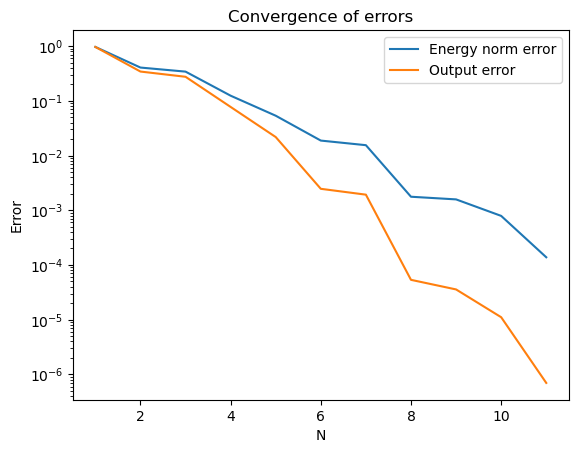

In [32]:
# Generate the test parameters
Xi_test = np.linspace(0.1, 10, 100)

# Calculate the errors for energy norm and output
errors_energy = []
errors_output = []

for n in range(1, N + 1):
    Z_N = Z_matrix(n,medium_Mat['Ahq'],mu_samples2,medium_Mat['Fh'])
    Z_orth_N = gram_schmidt(Z_N, assemblage(theta(1),medium_Mat['Ahq']))
    
    max_error_energy = 0
    max_error_output = 0
    
    for mu in Xi_test:
        #  Compute the reduced basis solution
        u_N_mu, T_root_N_mu = reduced_basis_solution(mu, medium_Mat['Ahq'], medium_Mat['Fh'], Z_orth_N)
        # Projection of the solution on the high-dimensional space
        u_N_mu_high_dim = Z_orth_N @ u_N_mu
        
        # Compute the "truth" solution
        A_mu = assemblage(theta(mu), medium_Mat['Ahq']).tocsc()
        u_mu = spsolve(A_mu, medium_Mat['Fh'])
        T_root_mu = medium_Mat['Fh'].T @ u_mu
        
        # Compute the errors
        error_energy = np.linalg.norm(u_mu - u_N_mu_high_dim) / np.linalg.norm(u_mu)
        error_output = np.abs(T_root_mu - T_root_N_mu) / np.abs(T_root_mu)
        
        max_error_energy = max(max_error_energy, error_energy)
        max_error_output = max(max_error_output, error_output)
    
    errors_energy.append(max_error_energy)
    errors_output.append(max_error_output)

# Plot the convergence of the errors
plt.figure()
plt.semilogy(range(1, N + 1), errors_energy, label='Energy norm error')
plt.semilogy(range(1, N + 1), errors_output, label='Output error')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.title('Convergence of errors')
plt.show()

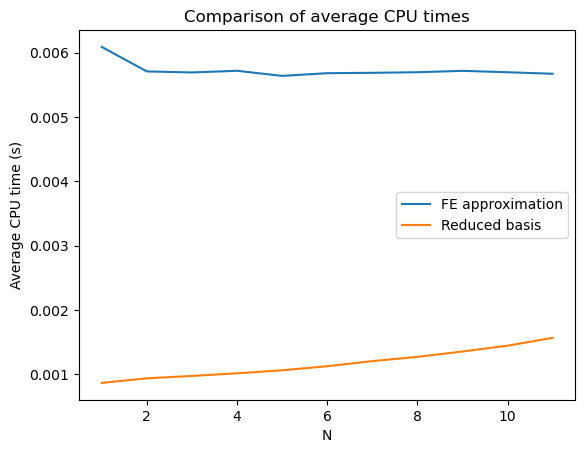

In [33]:
# Generate the test parameters
Xi_test = np.linspace(0.1, 10, 100)

# Mesure the CPU time for the FE approximation and the reduced basis
cpu_times_fe = []
cpu_times_rb = []

for n in range(1, N + 1):
    Z_N = Z_matrix(n, medium_Mat['Ahq'], mu_samples2, medium_Mat['Fh'])
    Z_orth_N = gram_schmidt(Z_N, assemblage(theta(1), medium_Mat['Ahq']))
    
    # Mesure the CPU time for the FE approximation
    start_time = time.time()
    for mu in Xi_test:
        A_mu = assemblage(theta(mu), medium_Mat['Ahq'])
        u_mu = spsolve(A_mu, medium_Mat['Fh'])
    end_time = time.time()
    cpu_time_fe = (end_time - start_time) / len(Xi_test)
    cpu_times_fe.append(cpu_time_fe)
    
    # Mesure the CPU time for the reduced basis
    start_time = time.time()
    for mu in Xi_test:
        u_N_mu,_ = reduced_basis_solution(mu, medium_Mat['Ahq'], medium_Mat['Fh'], Z_orth_N)
        # Projection of the solution on the high-dimensional space
        # u_N_mu_high_dim = Z_orth_N @ u_N_mu
    end_time = time.time()
    cpu_time_rb = (end_time - start_time) / len(Xi_test)
    cpu_times_rb.append(cpu_time_rb)

# Plot the comparison of the average CPU times
plt.figure()
plt.plot(range(1, N + 1), cpu_times_fe, label='FE approximation')
plt.plot(range(1, N + 1), cpu_times_rb, label='Reduced basis')
plt.xlabel('N')
plt.ylabel('Average CPU time (s)')
plt.legend()
plt.title('Comparison of average CPU times')
plt.show()

In [34]:
# Calculate the required N for a target accuracy of 1%
target_accuracy = 0.01
N_required = next(n for n, error in enumerate(errors_output, start=1) if error <= target_accuracy)

# Compute the CPU time for the FE approximation and the reduced basis for the required N
cpu_time_fe_required = cpu_times_fe[N_required - 1]
cpu_time_rb_required = cpu_times_rb[N_required - 1]
cpu_time_savings = cpu_time_fe_required - cpu_time_rb_required

# Print the results
print(f"Value of N required for 1% accuracy: {N_required}")
print(f"CPU time for FE approximation: {cpu_time_fe_required:.6e} seconds")
print(f"CPU time for reduced basis: {cpu_time_rb_required:.6e} seconds")
print(f"CPU time savings: {cpu_time_savings:.6e} seconds")

Value of N required for 1% accuracy: 6
CPU time for FE approximation: 5.678992e-03 seconds
CPU time for reduced basis: 1.127884e-03 seconds
CPU time savings: 4.551108e-03 seconds


The same remark applies in this part: the reduced basis helps us save computation time.

##### Using fine FE triangulation

In [35]:
grids = loadmat('FE_grid.mat',simplify_cells=True)
print(grids.keys())
fine_grid = grids['FE_grid']['fine']
# show the keys in the grid
print(fine_grid.keys())
print("number of nodes:",fine_grid['nodes'])
print("number of elements:",fine_grid['elements'])
x=fine_grid['coor'][:,0]
y=fine_grid['coor'][:,1]
z=np.sin(np.pi*x)*np.cos(np.pi*y)
# be careful  the indices must start at 0, in mat files they start at one, so substract 1
triangles=np.concatenate(fine_grid['theta'][0:5]-1)
T=tri.Triangulation(x,y,triangles)

dict_keys(['__header__', '__version__', '__globals__', 'FE_grid'])
dict_keys(['nodes', 'coor', 'elements', 'theta'])
number of nodes: 17899
number of elements: 33520


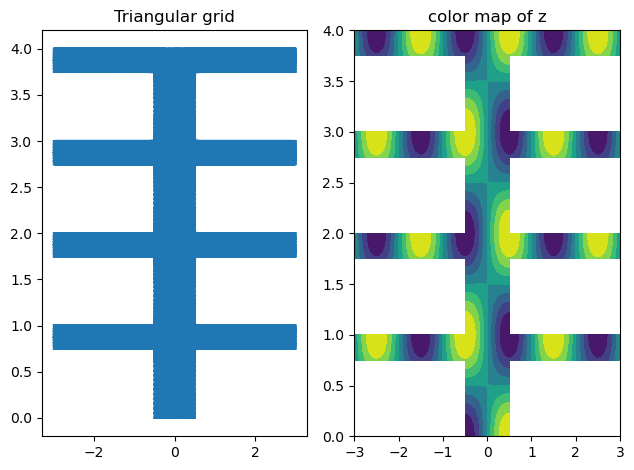

In [36]:
def plot(mesh,u):
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs = axs.flatten()

    # Plot the triangulation.
    axs[0].triplot(mesh)
    axs[0].set_title('Triangular grid')

    # Plot the color map.
    axs[1].tricontourf(mesh,u)
    axs[1].set_title('color map of z')
    fig.tight_layout()
    plt.show()
plot(T,z)

In [37]:
mu_samples = loadmat('RB_sample.mat',simplify_cells=True)
print(mu_samples["RB_sample"].keys())
mu_samples1 = mu_samples['RB_sample']['sample1'] 
print(mu_samples1)

dict_keys(['sample1', 'sample2', 'sample3'])
[ 0.1        10.          0.19179103  3.94420606  0.12618569  0.38535286
  2.15443469  0.10974988]


In this part, i will game by the sample1

In [38]:
FE_matrix = loadmat('FE_matrix.mat',simplify_cells=True)
print(FE_matrix.keys())
fine_Mat = FE_matrix['FE_matrix']['fine']
# show the keys in the grid
print(fine_Mat.keys())
# Afficher les matrices disponibles
print("Ahq matrix:")
print(fine_Mat['Ahq'])

dict_keys(['__header__', '__version__', '__globals__', 'FE_matrix'])
dict_keys(['Ahq', 'Fh'])
Ahq matrix:
[<17899x17899 sparse matrix of type '<class 'numpy.float64'>'
 	with 21554 stored elements in Compressed Sparse Column format>
 <17899x17899 sparse matrix of type '<class 'numpy.float64'>'
 	with 21554 stored elements in Compressed Sparse Column format>
 <17899x17899 sparse matrix of type '<class 'numpy.float64'>'
 	with 21554 stored elements in Compressed Sparse Column format>
 <17899x17899 sparse matrix of type '<class 'numpy.float64'>'
 	with 20162 stored elements in Compressed Sparse Column format>
 <17899x17899 sparse matrix of type '<class 'numpy.float64'>'
 	with 35487 stored elements in Compressed Sparse Column format>
 <17899x17899 sparse matrix of type '<class 'numpy.float64'>'
 	with 6769 stored elements in Compressed Sparse Column format>]


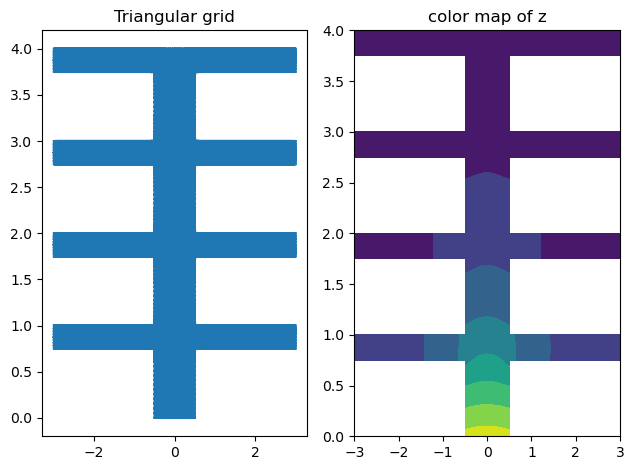

In [39]:
# Store the solution for each mu
N = 8
Solution = {}
for n in mu_samples1:
    theta_n = theta(n)
    A = assemblage(theta_n,fine_Mat['Ahq']).tocsc()
    U = spsolve(A,fine_Mat['Fh'])
    Solution[n] = U
# Plot the solution for the first any mu
T=tri.Triangulation(x,y,triangles)
plot(T,Solution[mu_samples1[6]])

Also, be careful when computing the matrix condition as it can take a lot of time.

In [40]:
# # Calculate the condition number of the matrix A_1 and A_10 without orthogonalisation
Z = Z_matrix(N,fine_Mat['Ahq'],mu_samples1,fine_Mat['Fh'])
A_1 = assemblage(theta(1),fine_Mat['Ahq'])
A_10 = assemblage(theta(10),fine_Mat['Ahq'])
# A_N_1 = Z.T @ A_1 @ Z
# A_N_10 = Z.T @ A_10 @ Z
# print("Condition number of A_1:",condition_number(A_1))
# print("Condition number of A_10:",condition_number(A_10))

In [41]:
# Calculate the condition number of the matrix A_1 and A_10 with orthogonalisation
Z_orth = gram_schmidt(Z, A_1)
A_N_1_orth = Z_orth.T @ A_1 @ Z_orth
A_N_10_orth = Z_orth.T @ A_10 @ Z_orth
print("Condition number of A_1 with orthogonalisation:",condition_number(A_N_1_orth))
print("Condition number of A_10 with orthogonalisation:",condition_number(A_N_10_orth))

Condition number of A_1 with orthogonalisation: 1.0000000016619113
Condition number of A_10 with orthogonalisation: 9.92681278747997


In [42]:
# solve the reduced basis approximation for mu = 1 using the snapshots, mu_2 = 10 and mu_3 = 1.0975
mu_1 = 0.1
mu_2 = 10.0
mu_3 = 1.0975
u_N_mu_1,_= reduced_basis_solution(mu_1, fine_Mat['Ahq'], fine_Mat['Fh'], Z)
u_N_mu_2,_ = reduced_basis_solution(mu_2, fine_Mat['Ahq'], fine_Mat['Fh'], Z)
u_N_mu_3,_ = reduced_basis_solution(mu_3, fine_Mat['Ahq'], fine_Mat['Fh'], Z)
print("u_N(mu_1) using snapshots directly in Z:", u_N_mu_1)
print("u_N(mu_2) using snapshots directly in Z:", u_N_mu_2)
print("u_N(mu_3) using snapshots directly in Z:", u_N_mu_3)

u_N(mu_1) using snapshots directly in Z: [ 1.00000000e+00  5.21598690e-14  3.22783027e-13  4.31574686e-13
 -7.93752076e-13  1.30104312e-12  2.19571658e-11  3.93007429e-10]
u_N(mu_2) using snapshots directly in Z: [ 3.85989893e-01  1.00000000e+00  2.00883201e-14  3.70150718e-13
 -1.77282043e-13  1.00504191e-13 -9.33106975e-12  7.61485033e-11]
u_N(mu_3) using snapshots directly in Z: [ 0.53836682  0.7674429   1.07600867  2.26684471 -2.411748    1.27976161
  1.75173595 -5.16570657]


In [43]:
# solve the reduced basis approximation for mu = 1 and mu = 10 using the orthogonalised snapshots
u_N_mu_1_orth,_ = reduced_basis_solution(mu_1, fine_Mat['Ahq'], fine_Mat['Fh'], Z_orth)
u_N_mu_2_orth,_ = reduced_basis_solution(mu_2, fine_Mat['Ahq'], fine_Mat['Fh'], Z_orth)
print("u_N(mu_1) with Gram-Schmidt:", u_N_mu_1_orth)
print("u_N(mu_2) with Gram-Schmidt:", u_N_mu_2_orth)


u_N(mu_1) with Gram-Schmidt: [ 1.92035734e+00 -6.65141693e-16  3.78103316e-15  8.19148888e-15
 -1.42907837e-14 -2.12947502e-14  1.57742191e-14  4.87555700e-15]
u_N(mu_2) with Gram-Schmidt: [ 7.41238525e-01  8.79879932e-01 -1.99905533e-15 -1.01029039e-16
  6.06159743e-16  8.11661683e-16 -3.37904794e-15 -9.40795593e-16]


In [44]:
# Verification of the results for mu = 1.5
m = 1.5
_, T_root_N_mu= reduced_basis_solution(m,fine_Mat['Ahq'],fine_Mat['Fh'], Z_orth)
print("T_root_N(mu) for mu = 1.5:", T_root_N_mu)

T_root_N(mu) for mu = 1.5: 1.5362662179854092


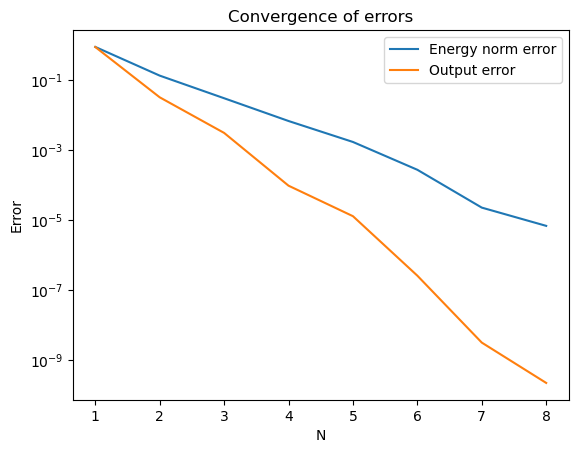

In [45]:
# Generate the test parameters
Xi_test = np.linspace(0.1, 10, 100)

# Calculate the errors for energy norm and output
errors_energy = []
errors_output = []

for n in range(1, N + 1):
    Z_N = Z_matrix(n,fine_Mat['Ahq'],mu_samples1,fine_Mat['Fh'])
    Z_orth_N = gram_schmidt(Z_N, assemblage(theta(1),fine_Mat['Ahq']))
    
    max_error_energy = 0
    max_error_output = 0
    
    for mu in Xi_test:
        #  Compute the reduced basis solution
        u_N_mu, T_root_N_mu = reduced_basis_solution(mu, fine_Mat['Ahq'], fine_Mat['Fh'], Z_orth_N)
        # Projection of the solution on the high-dimensional space
        u_N_mu_high_dim = Z_orth_N @ u_N_mu
        
        # Compute the "truth" solution
        A_mu = assemblage(theta(mu), fine_Mat['Ahq']).tocsc()
        u_mu = spsolve(A_mu, fine_Mat['Fh'])
        T_root_mu = fine_Mat['Fh'].T @ u_mu
        
        # Compute the errors
        error_energy = np.linalg.norm(u_mu - u_N_mu_high_dim) / np.linalg.norm(u_mu)
        error_output = np.abs(T_root_mu - T_root_N_mu) / np.abs(T_root_mu)
        
        max_error_energy = max(max_error_energy, error_energy)
        max_error_output = max(max_error_output, error_output)
    
    errors_energy.append(max_error_energy)
    errors_output.append(max_error_output)

# Plot the convergence of the errors
plt.figure()
plt.semilogy(range(1, N + 1), errors_energy, label='Energy norm error')
plt.semilogy(range(1, N + 1), errors_output, label='Output error')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.title('Convergence of errors')
plt.show()

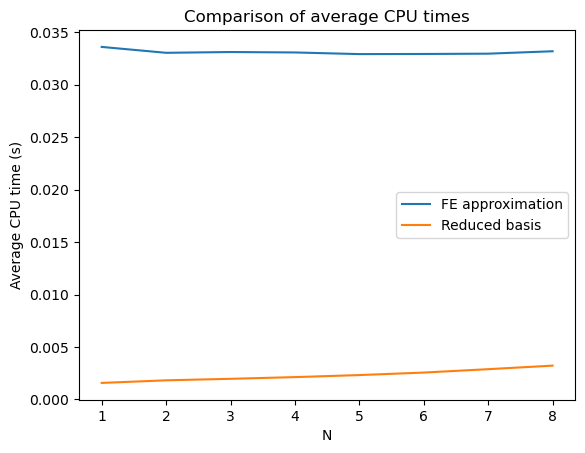

In [46]:
# Generate the test parameters
Xi_test = np.linspace(0.1, 10, 100)

# Mesure the CPU time for the FE approximation and the reduced basis
cpu_times_fe = []
cpu_times_rb = []

for n in range(1, N + 1):
    Z_N = Z_matrix(n, fine_Mat['Ahq'], mu_samples1, fine_Mat['Fh'])
    Z_orth_N = gram_schmidt(Z_N, assemblage(theta(1), fine_Mat['Ahq']))
    
    # Mesure the CPU time for the FE approximation
    start_time = time.time()
    for mu in Xi_test:
        A_mu = assemblage(theta(mu), fine_Mat['Ahq'])
        u_mu = spsolve(A_mu, fine_Mat['Fh'])
    end_time = time.time()
    cpu_time_fe = (end_time - start_time) / len(Xi_test)
    cpu_times_fe.append(cpu_time_fe)
    
    # Mesure the CPU time for the reduced basis
    start_time = time.time()
    for mu in Xi_test:
        u_N_mu,_ = reduced_basis_solution(mu, fine_Mat['Ahq'], fine_Mat['Fh'], Z_orth_N)
        # Projection of the solution on the high-dimensional space
        # u_N_mu_high_dim = Z_orth_N @ u_N_mu
    end_time = time.time()
    cpu_time_rb = (end_time - start_time) / len(Xi_test)
    cpu_times_rb.append(cpu_time_rb)

# Plot the comparison of the average CPU times
plt.figure()
plt.plot(range(1, N + 1), cpu_times_fe, label='FE approximation')
plt.plot(range(1, N + 1), cpu_times_rb, label='Reduced basis')
plt.xlabel('N')
plt.ylabel('Average CPU time (s)')
plt.legend()
plt.title('Comparison of average CPU times')
plt.show()

In [47]:
# Calculate the required N for a target accuracy of 1%
target_accuracy = 0.01
N_required = next(n for n, error in enumerate(errors_output, start=1) if error <= target_accuracy)

# Compute the CPU time for the FE approximation and the reduced basis for the required N
cpu_time_fe_required = cpu_times_fe[N_required - 1]
cpu_time_rb_required = cpu_times_rb[N_required - 1]
cpu_time_savings = cpu_time_fe_required - cpu_time_rb_required

# Afficher les résultats
print(f"Value of N required for 1% accuracy: {N_required}")
print(f"CPU time for FE approximation: {cpu_time_fe_required:.6e} seconds")
print(f"CPU time for reduced basis: {cpu_time_rb_required:.6e} seconds")
print(f"CPU time savings: {cpu_time_savings:.6e} seconds")

Value of N required for 1% accuracy: 3
CPU time for FE approximation: 3.310909e-02 seconds
CPU time for reduced basis: 1.967824e-03 seconds
CPU time savings: 3.114126e-02 seconds


In this case, we have $ N = 8 $, which means our basis is rich enough to approximate the solution with good accuracy. The CPU time for the reduced basis is much lower than the CPU time for the FE approximation. The CPU time savings is about $ 2.9 \times 10^{-2} $ seconds. The value of $ N $ required for 1% accuracy is 3. The reduced basis method is very efficient in this case.

### 3. We now consider another one-parameter ($ P = 1 $) problem. This time, we assume that the conductivities are fixed at $ \{k_1, k_2, k_3, k_4\} = \{0.4, 0.6, 0.8, 1.2\} $, and that only the Biot number, $ \text{Bi} $, is allowed to vary from 0.01 to 1. The sample set $ S_N $ for $ N_{\text{max}} = 11 $ is given by log equidistributed sampling. Generate an orthonormal $ Z $ from the sample set using the medium triangulation.



In [48]:
# Definde a function take parameter $Bi$ and return a vector of size six
def theta_B(Bi):
    return np.array([0.4,0.6,0.8,1.2,1,Bi])
mu_samples = loadmat('RB_sample.mat',simplify_cells=True)
print(mu_samples["RB_sample"].keys())
mu_samples2 = mu_samples['RB_sample']['sample2'] 
print(mu_samples2)

dict_keys(['sample1', 'sample2', 'sample3'])
[0.01       1.         0.0191791  0.28480359 0.09326033 0.62802914
 0.01261857 0.83021757 0.05094138 0.17886495 0.43287613]


In [49]:
N = 11
# Generate the snapshots of the solution
def Z_matrix(N,Aq,sample,Fh):
    Z = []
    for i in range(0,N):
        Bi = theta_B(sample[i])
        A = assemblage(Bi,Aq)
        Z_i = spsolve(csc_matrix(A),Fh)
        Z.append(Z_i)
    return np.array(Z).T
Z = Z_matrix(N,coarse_Mat['Ahq'],mu_samples2,coarse_Mat['Fh'])
Z_orth = gram_schmidt(Z, assemblage(theta_B(1),coarse_Mat['Ahq']))

In [50]:
# Solve the reduced basis problem
def reduced_basis_solution(Bi, Aq, Fh, Z):
    theta_Bi = theta_B(Bi)
    A_N_mu = Z.T @ assemblage(theta_Bi, Aq).tocsc() @ Z
    F_N = Z.T @ Fh
    u_N_mu = spsolve(A_N_mu, F_N)
    T_root_N_mu =  F_N.T @ u_N_mu
    return u_N_mu, T_root_N_mu

### a. Verify that, for $ \mu_0 = 0.4, 0.6, 0.8, 1.2, 0.15 $, i.e., $ \text{Bi} = 0.15 $, the value of the output is $ T_{\text{root},N}(\mu_0) = 1.53 $.


In [51]:
# Verification of the results for Bi = 0.15
Bi = 0.15
_, T_root_N_mu= reduced_basis_solution(Bi, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z_orth)
print("T_root_N(mu) for Bi = 0.15:", T_root_N_mu)

T_root_N(mu) for Bi = 0.15: 1.5127585693131458



#### b. We next introduce a regular test sample, $ \Xi_{\text{test}} \subset D $, of size $ n_{\text{test}} = 100 $ (in Python you can simply use `linspace(0.01, 1, 100)` to generate $ \Xi_{\text{test}} $). Plot the convergence of the maximum relative error in the energy norm $ \max_{\mu \in \Xi_{\text{test}}} \frac{|||u(\mu) - u_N(\mu)|||_\mu}{|||u(\mu)|||_\mu} $ and the maximum relative output error $ \max_{\mu \in \Xi_{\text{test}}} \frac{|T_{\text{root}}(\mu) - T_{\text{root},N}(\mu)|}{T_{\text{root}}(\mu)} $ as a function of $ N $ (use the Python command `semilogy` for plotting).

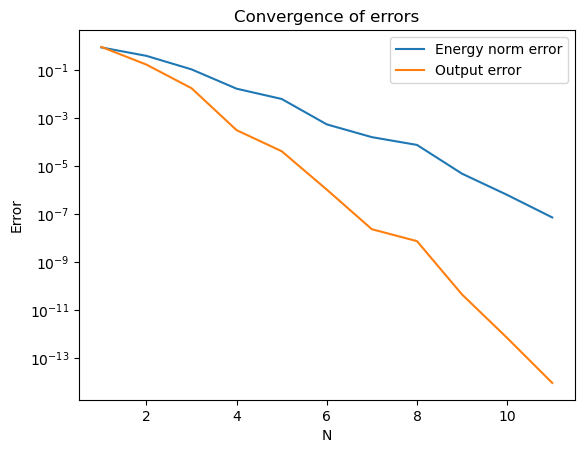

In [52]:
# Generate the test parameters
Xi_test = np.linspace(0.01, 1, 100)

# Calculate the errors for energy norm and output
errors_energy = []
errors_output = []

for n in range(1, N + 1):
    Z_N = Z_matrix(n, coarse_Mat['Ahq'], mu_samples2, coarse_Mat['Fh'])
    Z_orth_N = gram_schmidt(Z_N, assemblage(theta_B(1), coarse_Mat['Ahq']))
    
    max_error_energy = 0
    max_error_output = 0
    
    for Bi in Xi_test:
        # Calculer la solution réduite
        u_N_Bi,T_root_N_Bi = reduced_basis_solution(Bi, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z_orth_N)
        
        # Projrcte the solution on the high-dimensional space
        u_N_Bi_high_dim = Z_orth_N @ u_N_Bi
        
        # Calculate the "truth" solution
        A_Bi = assemblage(theta_B(Bi), coarse_Mat['Ahq'])
        u_Bi = spsolve(A_Bi, coarse_Mat['Fh'])
        T_root_Bi = coarse_Mat['Fh'].T @ u_Bi
        
        # Compute the errors
        error_energy = np.linalg.norm(u_Bi - u_N_Bi_high_dim) / np.linalg.norm(u_Bi)
        error_output = np.abs(T_root_Bi - T_root_N_Bi) / np.abs(T_root_Bi)
        
        max_error_energy = max(max_error_energy, error_energy)
        max_error_output = max(max_error_output, error_output)
    
    errors_energy.append(max_error_energy)
    errors_output.append(max_error_output)

# Plot the convergence of the errors
plt.figure()
plt.semilogy(range(1, N + 1), errors_energy, label='Energy norm error')
plt.semilogy(range(1, N + 1), errors_output, label='Output error')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.title('Convergence of errors')
plt.show()

The errors for both converge to zero

#### c. The Biot number is directly related to the cooling method; higher cooling rates (higher $ \text{Bi} $) imply lower (better) $ T_{\text{root}} $ but also higher (worse) initial and operational costs. We can thus define (say) a total cost function as

$$ C(\text{Bi}) = \text{Bi} + T_{\text{root}}(\text{Bi}), $$

minimization of which yields an optimal solution. Apply your (online) reduced-basis approximation for $ T_{\text{root},N} $ (that is, replace $ T_{\text{root}}(\text{Bi}) $ in (above) with $ T_{\text{root},N}(\text{Bi}) $) to find the optimal $ \text{Bi} $. Any (simple) optimization procedure suffices for the minimization.

In this case we define another function for the optimality 

In [53]:
# Define the cost function
def cost_function(Bi, Aq, Fh, Z):
    _, T_root_N_Bi= reduced_basis_solution(Bi[0], Aq, Fh, Z)
    return Bi[0] + T_root_N_Bi

# Minimize the cost function
result = minimize(cost_function, x0=[0.5], args=(coarse_Mat['Ahq'], coarse_Mat['Fh'], Z_orth), bounds=[(0.01, 1)])

# Print the optimal Bi and the optimal cost
optimal_Bi = result.x[0]
optimal_cost = result.fun
print(f"Optimal Bi: {optimal_Bi}")
print(f"Optimal cost: {optimal_cost}")

Optimal Bi: 0.40369720436726425
Optimal cost: 1.4622222614502005


#### **4. We consider now a two-parameter ($ P = 2 $) problem where the conductivities are assumed to be equivalent, i.e., $ k_1 = k_2 = k_3 = k_4 $, but are allowed to vary between 0.1 and 10; and the Biot number, $ \text{Bi} $, is allowed to vary from 0.01 to 1. The sample set $ S_N $ for $ N_{\text{max}} = 46 $ is given by the log random sampling. Generate an orthonormal $ Z $ from the sample set using the coarse triangulation.**

In [54]:
# Define the function Theta for K and Bi
def theta_K_Bi(k, Bi):
    return np.array([k, k, k, k, 1, Bi])

mu_samples = loadmat('RB_sample.mat',simplify_cells=True)
print(mu_samples["RB_sample"].keys())
mu_samples3 = mu_samples['RB_sample']['sample3'] 
print(mu_samples3.shape)

dict_keys(['sample1', 'sample2', 'sample3'])
(2, 46)


In [55]:
def assemblage(k, Bi, Aq):
    theta_k_Bi = theta_K_Bi(k, Bi)
    A = csc_matrix(Aq[0]*theta_k_Bi[0])
    for i in range(1, len(Aq)):
        A += theta_k_Bi[i] * Aq[i]
    return A

In [56]:
N = 46
# Generate the snapshots of the solution
def Z_matrix(K_sample,Bi_sample,Aq,Fh):
    Z = []
    for k,Bi in zip(K_sample,Bi_sample):
        A = assemblage(k, Bi, Aq).tocsc() 
        Z_i = spsolve(csc_matrix(A),Fh)
        Z.append(Z_i)
    return np.array(Z).T
Z = Z_matrix(mu_samples3[0],mu_samples3[1],coarse_Mat['Ahq'],coarse_Mat['Fh'])
Z_orth = gram_schmidt(Z, assemblage(1,0.1,coarse_Mat['Ahq']))
Z_orth.shape

(1333, 46)

In [57]:
# Solve the reduced basis problem
def reduced_basis_solution(K,Bi, Aq, Fh, Z):
    A_N_mu = Z.T @ assemblage(K, Bi, Aq).tocsc() @ Z
    F_N = Z.T @ Fh
    u_N_mu = spsolve(A_N_mu, F_N)
    T_root_N_mu =  F_N.T @ u_N_mu
    return u_N_mu, T_root_N_mu
k=0.1
Bi=0.01
u, T = reduced_basis_solution(k, Bi, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z_orth)
print(u.shape)
print(T)

(46,)
5.661724335282971


**5.** We next introduce a regular grid, $ \Xi_{\text{test}} \subset D $, of size $ n_{\text{test}} = 400 $ (a regular $ 20 \times 20 $ grid). Plot the convergence of the maximum relative error in the energy norm $ \max_{\mu \in \Xi_{\text{test}}} \frac{|||u(\mu) - u_N(\mu)|||_\mu}{|||u(\mu)|||_\mu} $ and the maximum relative output error $ \max_{\mu \in \Xi_{\text{test}}} \frac{|T_{\text{root}}(\mu) - T_{\text{root},N}(\mu)|}{T_{\text{root}}(\mu)} $ as a function of $ N $.

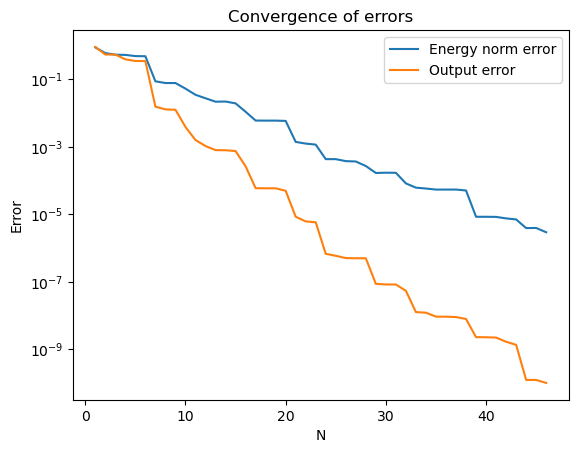

In [58]:
# Generate the test parameters
k_test = np.linspace(0.1, 10, 20)
Bi_test = np.linspace(0.01, 1, 20)
k_test, Bi_test = np.meshgrid(k_test, Bi_test)
k_test = k_test.flatten()
Bi_test = Bi_test.flatten()

# Calculate the errors for energy norm and output
errors_energy = []
errors_output = []
for n in range(1, N + 1):
    Z_N = Z[:, :n]
    Z_orth_N = gram_schmidt(Z_N, assemblage(1, 0.1, coarse_Mat['Ahq']))
    
    max_error_energy = 0
    max_error_output = 0
    
    for k, Bi in zip(k_test, Bi_test):
        # Compute the reduced basis solution
        u_N_mu, T_root_N_mu = reduced_basis_solution(k, Bi, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z_orth_N)
        # Projection of the solution on the high-dimensional space
        u_N_mu_high_dim = Z_orth_N @ u_N_mu
        
        # Compute the "truth" solution
        A_mu = assemblage(k,Bi, coarse_Mat['Ahq']).tocsc()
        u_mu = spsolve(A_mu, coarse_Mat['Fh'])
        T_root_mu = coarse_Mat['Fh'].T @ u_mu
        
        # Compute the errors
        error_energy = np.linalg.norm(u_mu - u_N_mu_high_dim) / np.linalg.norm(u_mu)
        error_output = np.abs(T_root_mu - T_root_N_mu) / np.abs(T_root_mu)
        
        max_error_energy = max(max_error_energy, error_energy)
        max_error_output = max(max_error_output, error_output)
    
    errors_energy.append(max_error_energy)
    errors_output.append(max_error_output)
# Plot the convergence of the errors
plt.figure()
plt.semilogy(range(1, N + 1), errors_energy, label='Energy norm error')
plt.semilogy(range(1, N + 1), errors_output, label='Output error')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.title('Convergence of errors')
plt.show()


Good approximation of the solution becouse the error is converge to zero 

#### **6. We now consider the POD method and we wish to compare it with the Greedy approximation. To this end, we sample log randomly the parameter space ($ P = 2 $) and take $ n_{\text{train}} = 100 $ samples. Build the POD approximation using these samples as the training set and compare the results with the Greedy approximation. Compute the RIC and the dimension of the POD space ($ N $) such that the RIC is 99% of the total energy. Plot the POD and Greedy convergence of the maximum relative error in the energy norm $ \max_{\mu \in \Xi_{\text{test}}} \frac{|||u(\mu) - u_N(\mu)|||_\mu}{|||u(\mu)|||_\mu} $ and the maximum relative output error $ \max_{\mu \in \Xi_{\text{test}}} \frac{|T_{\text{root}}(\mu) - T_{\text{root},N}(\mu)|}{T_{\text{root}}(\mu)} $ as a function of $ N $.**

Dimension N pour le RIC de 99%: 2


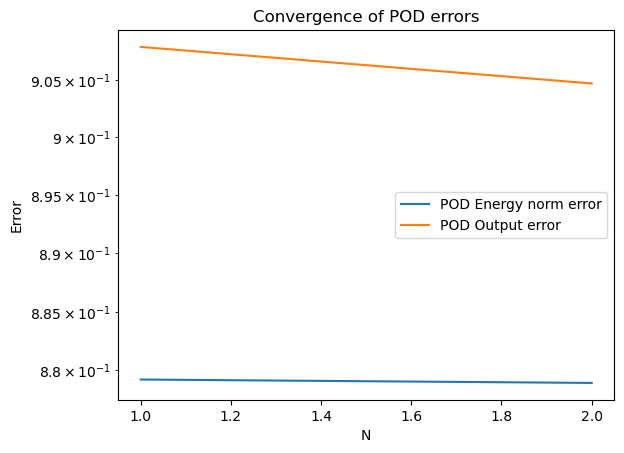

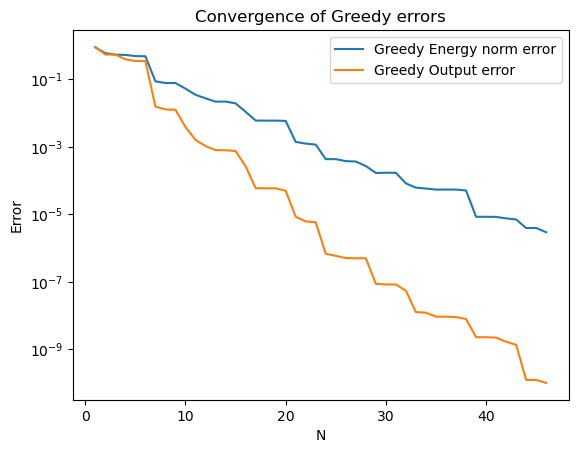

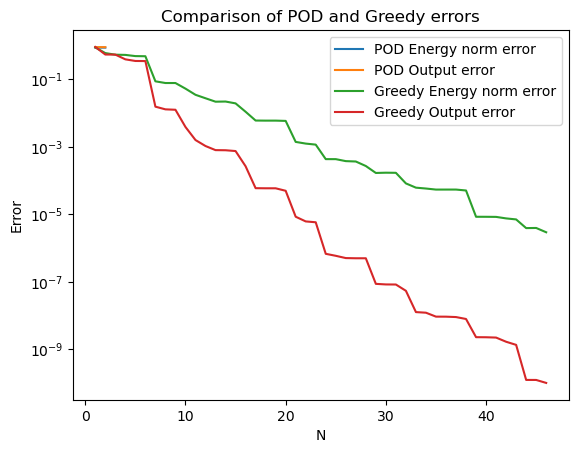

In [59]:
# Generate the training sample set for n_train = 100
n_train = 100
k_train = np.random.uniform(low=np.log(0.1), high=np.log(10), size=n_train)
k_train = np.exp(k_train)  
Bi_train = np.random.uniform(low=np.log(0.01), high=np.log(1), size=n_train)
Bi_train = np.exp(Bi_train)  
# Decompsation matrix of snapshots
U, S, Vt = np.linalg.svd(Z, full_matrices=False)

# Compute the RIC for the POD
total_energy = np.sum(S**2)
ric_energy = np.cumsum(S**2) / total_energy
N_pod = np.searchsorted(ric_energy, 0.99) + 1  # Find the first index where the RIC is greater than 0.99
print(f"Dimension N pour le RIC de 99%: {N_pod}")

# Construct the POD basis
Z_pod = U[:, :N_pod]

# Generate the greedy 
k_test = np.linspace(0.1, 10, 20)
Bi_test = np.linspace(0.01, 1, 20)
k_test, Bi_test = np.meshgrid(k_test, Bi_test)
k_test = k_test.flatten()
Bi_test = Bi_test.flatten()

# Compute the errors for the POD and Greedy
errors_energy_pod = []
errors_output_pod = []
errors_energy_greedy = []
errors_output_greedy = []

for n in range(1, N_pod + 1):
    Z_N_pod = Z_pod[:, :n]
    Z_orth_N_pod = gram_schmidt(Z_N_pod, assemblage(1, 0.1, coarse_Mat['Ahq']))
    
    max_error_energy_pod = 0
    max_error_output_pod = 0
    
    for k, Bi in zip(k_test, Bi_test):
        # Cpompute the reduced basis solution for POD
        u_N_mu_pod, T_root_N_mu_pod = reduced_basis_solution(k, Bi, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z_orth_N_pod)
        
        # Project u_N_mu_pod into the high-dimensional space
        u_N_mu_high_dim_pod = Z_orth_N_pod @ u_N_mu_pod
        
        # Compute the reference solution (truth solution)
        A_mu = assemblage(k, Bi, coarse_Mat['Ahq'])
        u_mu = spsolve(A_mu, coarse_Mat['Fh'])
        T_root_mu = coarse_Mat['Fh'].T @ u_mu
        
        # Compute the relative errors for POD
        error_energy_pod = np.linalg.norm(u_mu - u_N_mu_high_dim_pod) / np.linalg.norm(u_mu)
        error_output_pod = np.abs(T_root_mu - T_root_N_mu_pod) / np.abs(T_root_mu)
        
        max_error_energy_pod = max(max_error_energy_pod, error_energy_pod)
        max_error_output_pod = max(max_error_output_pod, error_output_pod)
    
    errors_energy_pod.append(max_error_energy_pod)
    errors_output_pod.append(max_error_output_pod)

# Plot the convergence of the errors for POD
plt.figure()
plt.semilogy(range(1, N_pod + 1), errors_energy_pod, label='POD Energy norm error')
plt.semilogy(range(1, N_pod + 1), errors_output_pod, label='POD Output error')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.title('Convergence of POD errors')
plt.show()

# Compute the Greedy
for n in range(1, N + 1):
    Z_N_greedy = Z[:, :n]
    Z_orth_N_greedy = gram_schmidt(Z_N_greedy, assemblage(1, 0.1, coarse_Mat['Ahq']))
    
    max_error_energy_greedy = 0
    max_error_output_greedy = 0
    
    for k, Bi in zip(k_test, Bi_test):
        # Compute the reduced basis solution for Greedy
        u_N_mu_greedy, T_root_N_mu_greedy = reduced_basis_solution(k, Bi, coarse_Mat['Ahq'], coarse_Mat['Fh'], Z_orth_N_greedy)
        
        # Project u_N_mu_greedy into the high-dimensional space
        u_N_mu_high_dim_greedy = Z_orth_N_greedy @ u_N_mu_greedy
        
        # Compute the reference solution (truth solution)
        A_mu = assemblage(k, Bi, coarse_Mat['Ahq'])
        u_mu = spsolve(A_mu, coarse_Mat['Fh'])
        T_root_mu = coarse_Mat['Fh'].T @ u_mu
        # Compute the relative errors for Greedy
        error_energy_greedy = np.linalg.norm(u_mu - u_N_mu_high_dim_greedy) / np.linalg.norm(u_mu)
        error_output_greedy = np.abs(T_root_mu - T_root_N_mu_greedy) / np.abs(T_root_mu)
        
        max_error_energy_greedy = max(max_error_energy_greedy, error_energy_greedy)
        max_error_output_greedy = max(max_error_output_greedy, error_output_greedy)
    
    errors_energy_greedy.append(max_error_energy_greedy)
    errors_output_greedy.append(max_error_output_greedy)

# Plot the convergence of the errors for Greedy
plt.figure()
plt.semilogy(range(1, N + 1), errors_energy_greedy, label='Greedy Energy norm error')
plt.semilogy(range(1, N + 1), errors_output_greedy, label='Greedy Output error')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.title('Convergence of Greedy errors')
plt.show()

# Compare the errors for POD and Greedy
plt.figure()
plt.semilogy(range(1, N_pod + 1), errors_energy_pod, label='POD Energy norm error')
plt.semilogy(range(1, N_pod + 1), errors_output_pod, label='POD Output error')
plt.semilogy(range(1, N + 1), errors_energy_greedy, label='Greedy Energy norm error')
plt.semilogy(range(1, N + 1), errors_output_greedy, label='Greedy Output error')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.title('Comparison of POD and Greedy errors')
plt.show()

With the POD method, we need just $ N = 2 $ to reach the maximum energy, which means 99% of the total energy. This indicates that the reduced basis is well implemented and achieves the desired results, saving computation time.

#### 7. Implement the parametrization with respect to $ L $ and $ t $. The reference geometry is the one given by the .geo file and the corresponding $ \hat{L} $ and $ \hat{t} $. Plot the mean temperature $ T_{\text{root}}(\mu) $ as a function $ t \in [0.1, 0.5] $ and the other parameters set to $ k_i = 0.1, L = 2.5, \text{Bi} = 0.1 $.

In this part, I applied my ideas and what i understanding, and finally, I obtained some results.

In [60]:
# Définir la fonction Theta pour les paramètres k, L, t et Bi
def theta(k, L, t, Bi):
    return np.array([k*t*L, k*t*L, k*t*L, k*t*L, 1,(2*L+t)* Bi])

# Assemblage de la matrice A avec les paramètres k, L, t et Bi donnés et la matrice Aq
def assemblage(k, L, t, Bi, Aq):
    theta_k_L_t_Bi = theta(k, L, t, Bi)
    A = csc_matrix(Aq[0]*theta_k_L_t_Bi[0])
    for i in range(1, len(Aq)):
        A += theta_k_L_t_Bi[i] * Aq[i]
    return A
# Calculer la température moyenne T_root(mu)
def calculate_T_root(k, L, t, Bi, Aq, Fh):
    A = assemblage(k, L, t, Bi, Aq).tocsc()  # Convertir en format CSC
    u = spsolve(A, Fh)
    T_root = Fh.T @ u
    return T_root

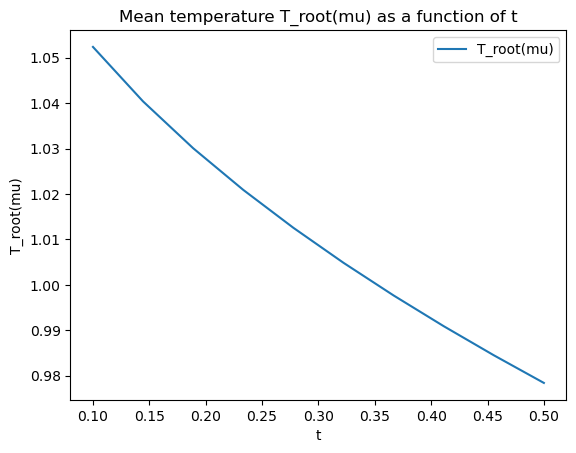

In [61]:
# Générer les valeurs de t dans l'intervalle [0.1, 0.5]
t_values = np.linspace(0.1, 0.5, 10)

# Calculer T_root(mu) pour chaque valeur de t
T_root_values = []
k_i = 0.1
L = 2.5
Bi = 0.1

for t in t_values:
    T_root = calculate_T_root(k_i, L, t, Bi, coarse_Mat['Ahq'], coarse_Mat['Fh'])
    T_root_values.append(T_root)

# Tracer T_root(mu) en fonction de t
plt.figure()
plt.plot(t_values, T_root_values, label='T_root(mu)')
plt.xlabel('t')
plt.ylabel('T_root(mu)')
plt.legend()
plt.title('Mean temperature T_root(mu) as a function of t')
plt.show()

This is the result I found, which means that $ T_{\text{root}} $ increases as $ t $ decreases.

# 3. A Posteriori Error Bounds, Greedy Sampling Procedure

We consider again the problem of designing a thermal fin of Problem Set 1 and 2. Given the reduced basis approximation implemented in PS2, we turn to implementing the associated a posteriori error estimation procedures developed in the lecture. The second half of this problem set is devoted to implementing the greedy sampling procedure. We will consider the following two cases:

## Case I ($P = 1$)
We keep the Biot number fixed at $Bi = 0.1$ and assume that the conductivities of all fins are equivalent, i.e., $k = k_1 = k_2 = k_3 = k_4$, but are allowed to vary between 0.1 and 10 — we thus have $\mu \in D = [0.1, 10]$. For this $P = 1$ case, we define the $X$-inner product:

$$
(\cdot, \cdot)_X = a(\cdot, \cdot; \bar{\mu}),
$$

where $\bar{\mu} = 1$.

We also define the parameter grids $G_{\text{lin}}[\mu_{\text{min}}, \mu_{\text{max}}; 10]$ and $G_{\text{log}}[\mu_{\text{min}}, \mu_{\text{max}}; 10]$. The former grid is equi-spaced in $\mu$, the latter grid is equi-spaced in $\ln(\mu)$ — often advantageous within the reduced basis context. More generally, the “log” spacing represents equal relative increments and thus represents better coverage for parameters that vary over a large range. For the $P = 2$ case, we can then define tensor grids over $D$, $\Xi_{\text{log}}^M \subset D \subset \mathbb{R}^2$, as:

$$
\Xi_{\text{log}}^M = G_{\text{log}}[\mu_{\text{min}}, \mu_{\text{max}}; M] \times G_{\text{log}}[\mu_{\text{min}}, \mu_{\text{max}}; M];
$$

note $\Xi_{\text{log}}^M$ contains $M^2$ points; a similar definition applies to $\Xi_{\text{lin}}^M$. We also define a particular test grid (biased neither towards “log” nor “lin”):

$$
\Xi_{\text{test}}^M = \Xi_{\text{lin}}^M \cup \Xi_{\text{log}}^M;
$$

note $\Xi_{\text{test}}^M$ contains $2M^2$ points.

Given the coercivity lower bound, we can now turn to implementing the a posteriori error bounds. Note that, in principle, there is an online-inefficient and an online-efficient way to evaluate these error bounds. We first consider the latter: From the lecture, we know that the energy norm a posteriori error bound is given by:

$$
\Delta_{e, N}(\mu) = \frac{\|\hat{e}(\mu)\|_X}{\sqrt{\alpha_{LB}(\mu)}},
$$

where $\hat{e}(\mu) \in X$ satisfies:

$$
(\hat{e}(\mu), v)_X = r(v; \mu), \quad \forall v \in X,
$$

and the residual is given by:

$$
r(v; \mu) = f(v; \mu) - a(u_N(\mu), v; \mu), \quad \forall v \in X.
$$

For any new $\mu$ and associated reduced basis solution $u_N(\mu)$, we can now directly calculate $\hat{e}(\mu)$ from (2.2) and (2.3), evaluate the norm $\|\hat{e}(\mu)\|_X$, and — given $\alpha_{LB}(\mu)$ — obtain $\Delta_{e, N}(\mu)$ from (2.1). Although this approach is online-inefficient because the computational cost depends on $O(N)$, it is nevertheless useful as a means to test your offline-online computational decomposition. We will consider Case I and Case II in the sequel. Note that you should only require one code to handle both cases, i.e., Case I is a specialization of Case II by keeping one of the parameters fixed. Also, when using you should try to replace loops by matrix-vector products as much as possible (e.g., try to write the nested loop over $N$ when summing up the contributions of the $\|\hat{e}(\mu)\|_X$ norm as a vector-matrix-vector product — the nested loop over $Q_a$ is less critical).

We first consider Case I. To answer this question you should use the sample set $S_N$ provided for PS2 (`RB_sample.sample1`), orthonormalize the basis functions, and use the medium grid.

a. Implement an offline/online version of the a posteriori error bound calculation (not using the affine decomposition) shown in the lecture (this is inefficient). Compute the direct calculation for the error bound, $\Delta_{e, N}(\mu)$, for all $N (1 \leq N \leq 8)$ and (say) 5 parameter values randomly distributed in $D$.



I also imeplemnted somme ingredient to calculat that 

In [62]:
# Charger les matrices
FE_matrix = loadmat('FE_matrix.mat', simplify_cells=True)
medium_Mat = FE_matrix['FE_matrix']['medium']

# Charger les échantillons
mu_samples = loadmat('RB_sample.mat', simplify_cells=True)
mu_samples1 = mu_samples['RB_sample']['sample1']

def theta(mu):
    return np.array([mu,mu,mu,mu,1,0.1])

def assemblage(mu,Aq):
    A = csc_matrix(mu[0]*Aq[0])
    for i in range(1,6):
        A += mu[i]*Aq[i]
    return A
# Solve the reduced basis problem
def reduced_basis_solution(mu, Aq, Fh, Z):
    theta_mu = theta(mu)
    A_N_mu = Z.T @ assemblage(theta_mu, Aq) @ Z
    F_N = Z.T @ Fh
    u_N_mu = spsolve(csc_matrix(A_N_mu), F_N)
    T_root_N_mu =  F_N.T @ u_N_mu
    return u_N_mu, T_root_N_mu
N = 8
# Generate the snapshots of the solution
def Z_matrix(N,Aq,sample,Fh):
    Z = []
    for i in range(0,N):
        mu = theta(sample[i])
        A = assemblage(mu,Aq)
        Z_i = spsolve(csc_matrix(A),Fh)
        Z.append(Z_i)
    return np.array(Z).T
Z = Z_matrix(N,medium_Mat['Ahq'],mu_samples1,medium_Mat['Fh'])
Z_orth = gram_schmidt(Z, assemblage(theta(1),medium_Mat['Ahq']))
Z_orth.shape

(4760, 8)

In [63]:
# Define the residual function
def residual(k, Aq, Fh, u_N_mu, Z):
    A = assemblage(theta(k), Aq).tocsc()
    u_N_mu_high_dim = Z @ u_N_mu
    r = A @ u_N_mu_high_dim - Fh
    return r
# Define the error norm function of e_hat
def error_norm(k, Aq, Fh, u_N_mu, Z):
    r = residual(k, Aq, Fh, u_N_mu, Z)
    A = assemblage(theta(k), Aq).tocsc()
    # A_orth = Z.T @ A @ Z
    e_hat = spsolve(csc_matrix(A), r)
    norm_e_hat = np.sqrt(e_hat.T @ A @ e_hat)
    return norm_e_hat
# Compute the lower bound of alpha
def compute_alpha_LB(k, Aq):
    A = assemblage(theta(k), Aq).tocsc()
    # A_orth = Z.T @ A @ Z
    smallest_eigenvalue = eigsh(A, k=1, which='SM', return_eigenvectors=False)[0]
    return smallest_eigenvalue
# Compute the error Delta_e_N
def error_bound(k, Aq, Fh, u_N_mu, Z):
    alpha_LB = compute_alpha_LB(k, Aq)
    norm_e_hat = error_norm(k, Aq, Fh, u_N_mu, Z)
    Delta_e_N = norm_e_hat / np.sqrt(alpha_LB)
    return Delta_e_N

In [64]:
# Define the parameters
mu_min = 0.1
mu_max = 10
num_points = 10

# Linear grid
G_lin = np.linspace(mu_min, mu_max, num_points)

# Logarithmic grid
G_log = np.exp(np.linspace(np.log(mu_min), np.log(mu_max), num_points))

# Union of the two grids
Xi_test = np.union1d(G_lin, G_log)

In [65]:
# Compute the posteriori error bounds
for k in Xi_test:
    for N in range(1, N+1):
        Z_N = Z[:, :N]
        Z_N = Z_orth[:, :N]
        u_N_mu,_ = reduced_basis_solution(k, medium_Mat['Ahq'], medium_Mat['Fh'], Z_N)
        Delta_e_N = error_bound(k, medium_Mat['Ahq'], medium_Mat['Fh'], u_N_mu, Z_N)
        # print(f"Delta_e_N for k={k}, N={N}: {Delta_e_N}")


b. Calculate $\eta_{e, N}^{\text{min}}, \eta_{e, N}^{\text{max}}, \eta_{e, N}^{\text{ave}}$, the minimum, maximum, and average effectivity $\eta_{e, N}(\mu)$ over: $\Xi_{\text{test}} = G_{\text{lin}}[\mu_{\text{min}}, \mu_{\text{max}}; 50] \cup G^{\ln}[\mu_{\text{min}}, \mu_{\text{max}}; 50],$
respectively (note that $\Xi_{\text{test}}$ is of size 20 since $P = 1$).

Present the results in a table for all $N$. Is the minimum effectivity greater than unity? How does the maximum effectivity compare with your theoretical upper bound for the effectivity? (Note: you should exclude from the min/max/mean-operation all points in $\Xi_{\text{test}}$ for which $\|u(\mu) - u_N(\mu)\|_X$ is less than (say) $10^{-11}$.)

In [66]:
# Compute the reference solution
def reference_solution(k, Aq, Fh):
    A = assemblage(theta(k),Aq).tocsc()  
    u = spsolve(A, Fh)
    return u

# Define the test parameters
M = 50
mu_lin = np.linspace(mu_min, mu_max, M)
mu_log = np.exp(np.linspace(np.log(mu_min), np.log(mu_max), M))
Xi_test = np.concatenate((mu_lin, mu_log))

# Compute the effectivities
effectivities = []

for mu in Xi_test:
    k = mu
    u_ref = reference_solution(k, medium_Mat['Ahq'], medium_Mat['Fh'])
    for N in range(1, N + 1):
        Z_N = Z[:, :N]
        Z_N = Z_orth[:, :N]
        u_N_mu,_ = reduced_basis_solution(k, medium_Mat['Ahq'], medium_Mat['Fh'], Z_N)
        u_diff = u_ref - (Z_N @ u_N_mu)
        error_norm_X = np.sqrt(u_diff.T @ assemblage(theta(k), medium_Mat['Ahq']) @ u_diff)
        if error_norm_X < 1e-11:
           eta_e_N = Delta_e_N / error_norm_X
           effectivities.append((N, eta_e_N))
        # print('norm',error_norm_X)

# Compute the effectivities for each N
effectivities = np.array(effectivities)


In [67]:
results = []
for N in range(1, N + 1):
    eta_N = effectivities[effectivities[:, 0] == N][:, 1]
    eta_min = np.min(eta_N)
    eta_max = np.max(eta_N)
    eta_ave = np.mean(eta_N)
    results.append([N, eta_min, eta_max, eta_ave])
# Print the results
print("N\teta_min\t\teta_max\t\teta_ave")
for result in results:
    print(f"{result[0]}\t{result[1]:.6f}\t{result[2]:.6f}\t{result[3]:.6f}")

N	eta_min		eta_max		eta_ave
1	161.268256	421.708664	291.488460
2	19.483919	276.539894	124.346795
3	20.584416	274.442629	124.548129
4	20.994199	213.755080	106.760625
5	20.899915	215.070018	106.723339
6	20.885020	207.053145	104.583411
7	20.873113	183.081014	96.924790
8	20.886200	181.776724	96.706532


We see that all effectivities are greater than one and correspond to what is defined in our course by:
$$
 1 \leq \eta_N(\mu) \leq \frac{\gamma_{UB}(\mu)}{\alpha_{LB}(\mu)}, \forall \mu \in \mathcal{D^{\mu}} 
 $$

# 4. Parabolic Problem

## 4.1 Thermal Fin Problem

Our problem of interest is the thermal fin discussed in the previous problem sets, but now we consider the time-dependent case. We assume that the thermal fin is initially at zero (non-dimensionalized) temperature and a heat flux is then applied to the root. The output of interest is the average temperature of the fin. 

We directly consider the truth approximation. To this end, we divide the time interval, $ I = (0, t_f] $, into $ K $ subintervals of equal length $ \Delta = \frac{t_f}{K} $, and define $ t_k = k \Delta t, \, 0 \leq k \leq K $. We shall consider Euler-Backward for the time integration. We also recall the truth finite element approximation space $ X \subset X_e $.

Our truth problem statement is then: given a parameter $ \mu \in D $, we evaluate the output:

$$
s_k(\mu) = l(u_k(\mu)), \quad 1 \leq k \leq K
$$

where the field variable $ u_k(\mu) \in X, \, 1 \leq k \leq K $, satisfies:

$$
m\left(\frac{u_k(\mu) - u_{k-1}(\mu)}{\Delta t}, v\right) + a(u_k(\mu), v; \mu) = f(v)g(t_k), \quad \forall v \in X
$$

with the initial condition:

$$
u(t_0; \mu) = u_0 = 0.
$$

Here:
- The bilinear form $ a $ is defined as in Problem Set 1.
- The linear form $ f $ is given by $ f(v) = \int_{\Gamma_{\text{root}}} v $.
- The linear form $ l $ is given by $ l(v) = \int_{\Omega} v $.
- The bilinear form $ m $ is given by:

$$
m(u, v) = \int_{\Omega} uv, \quad \forall u, v \in X
$$

and $ g(t_k) $ denotes the "control input" at time $ t = t_k $. Note that $ m $, $ l $, and $ f $ are parameter-independent.

### Special Case

We assume that the conductivities of all fins are equivalent and fixed at $ k_i = 1, \, i = 1, \ldots, 4 $, and that the Biot number is allowed to vary between $ 0.01 $ and $ 1 $. We thus have $ \mu \equiv Bi \in D = [0.01, 1] $. We consider the time interval $ I = (0, 10] $ with a discrete timestep $ \Delta t = 0.1 $ and thus $ K = 100 $.

To begin, download and unpack the zip file `PS4_Python.zip`. You will find the file `FE_matrix_mass.mat` which contains a struct, `FE_matrix_mass`, with the mass matrices for the fine, medium, and coarse triangulations used before. To generate the output vector $ L $, postmultiply the corresponding mass matrix with a vector containing all 1s. From the previous problem sets, you already have the required finite element forcing vector $ F $ and the finite element stiffness matrix $ A $ (and the $ A_q $). In the sequel, you should use the medium triangulation.












## 4.2 Part 1 - Reduced Basis Approximation

We first generate a reduced basis approximation by choosing a basis from scratch. To this end, we use $ g(t_k) = \delta_{1k}, \, 1 \leq k \leq 100 $ (unit impulse input) and set:

$$
X_N = \text{span}\{u_1(0.01), u_5(0.01), u_{10}(0.01), u_{20}(0.01), u_{30}(0.01), u_5(0.1), u_{10}(0.1), u_{20}(0.1), u_5(1), u_{10}(1)\}
$$

i.e., our reduced basis space $ X_N $ is spanned by the solution $ u_k(\mu) $ at several parameter-time pairs. We then orthonormalize $ X_N $ using Gram-Schmidt.

### Tasks

1. Write an offline-online code in Python for the reduced basis approximation (use LU decomposition for the truth and reduced basis time integration).
2. Plot the outputs $ s_k(\mu) $, $ s_k^N(\mu) $, and the error $ s_k(\mu) - s_k^N(\mu) $ as a function of time for $ g(t_k) = 1 - \cos(t_k) $ and $ \mu = 0.05 $.
3. Plot $ ||| u_k(\mu) ||| $, $ ||| u_k^N(\mu) ||| $, and the error $ ||| u_k(\mu) - u_k^N(\mu) ||| $ as a function of time for $ g(t_k) = 1 - \cos(t_k) $ and $ \mu = 0.05 $.

In [68]:
FE_matrix = loadmat('FE_matrix.mat',simplify_cells=True)
print(FE_matrix.keys())
medium_Mat = FE_matrix['FE_matrix']['medium']
# show the keys in the grid
print(medium_Mat.keys())
# Afficher les matrices disponibles
print("Ahq matrix:")
print(medium_Mat['Ahq'])

dict_keys(['__header__', '__version__', '__globals__', 'FE_matrix'])
dict_keys(['Ahq', 'Fh'])
Ahq matrix:
[<4760x4760 sparse matrix of type '<class 'numpy.float64'>'
 	with 5602 stored elements in Compressed Sparse Column format>
 <4760x4760 sparse matrix of type '<class 'numpy.float64'>'
 	with 5602 stored elements in Compressed Sparse Column format>
 <4760x4760 sparse matrix of type '<class 'numpy.float64'>'
 	with 5602 stored elements in Compressed Sparse Column format>
 <4760x4760 sparse matrix of type '<class 'numpy.float64'>'
 	with 5242 stored elements in Compressed Sparse Column format>
 <4760x4760 sparse matrix of type '<class 'numpy.float64'>'
 	with 9086 stored elements in Compressed Sparse Column format>
 <4760x4760 sparse matrix of type '<class 'numpy.float64'>'
 	with 3385 stored elements in Compressed Sparse Column format>]


In [69]:
FE_matrix = loadmat('FE_matrix_mass.mat',simplify_cells=True)
print(FE_matrix.keys())
medium_Mat_mass = FE_matrix['FE_matrix_mass']['medium']
# show the keys in the grid
print(medium_Mat_mass.keys())
# Afficher les matrices disponibles
print("Mh matrix:")
print(medium_Mat_mass['Mh'])

FE_matrix = loadmat('FE_matrix.mat', simplify_cells=True)
medium_Mat = FE_matrix['FE_matrix']['medium']


dict_keys(['__header__', '__version__', '__globals__', 'FE_matrix_mass'])
dict_keys(['Mh'])
Mh matrix:
  (0, 0)	0.0008573249999999995
  (4732, 0)	0.0004286624999999998
  (4733, 0)	0.0004286624999999998
  (1, 1)	0.0008573249999999996
  (4728, 1)	0.00042866249999999986
  (4730, 1)	0.0004286624999999998
  (2, 2)	9.474381000000122e-06
  (1337, 2)	1.645359166667822e-06
  (1338, 2)	3.2297025000007267e-06
  (4396, 2)	3.09183133333224e-06
  (4397, 2)	1.5074879999993351e-06
  (3, 3)	1.0036531333334115e-05
  (1334, 3)	3.2988509999984372e-06
  (1335, 3)	1.6488869999988405e-06
  (4550, 3)	3.3693786666682173e-06
  (4654, 3)	1.7194146666686208e-06
  (4, 4)	0.0002312210841666588
  (1540, 4)	0.00011561054208332941
  (1542, 4)	0.0001156105420833294
  (5, 5)	0.00023106015000003602
  (1403, 5)	0.00011553007500001802
  (1404, 5)	0.00011553007500001802
  (6, 6)	9.475422000008539e-06
  (1650, 6)	1.64562433333885e-06
  (1651, 6)	3.2302230000049352e-06
  :	:
  (4738, 4756)	0.0007085275565833335
  (4753, 4756)

In [70]:

medium_grid = grids['FE_grid']['medium']
x=medium_grid['coor'][:,0]
y=medium_grid['coor'][:,1]
z=np.sin(np.pi*x)*np.cos(np.pi*y)
# be careful  the indices must start at 0, in mat files they start at one, so substract 1
triangles=np.concatenate(medium_grid['theta'][0:5]-1)
T=tri.Triangulation(x,y,triangles)
mu_samples = loadmat('RB_sample.mat',simplify_cells=True)
print(mu_samples["RB_sample"].keys())
mu_samples1 = mu_samples['RB_sample']['sample1'] 
print(mu_samples1.shape)

dict_keys(['sample1', 'sample2', 'sample3'])
(8,)


#### **1. Write an offline-online code in Python for the reduced basis approximation (use LU decomposition for the truth and reduced basis time integration).**

In this part of the code, I implemented the Backward Euler method for the finite elements and plotted the result for an example.

/usr/lib/python3/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/usr/lib/python3/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


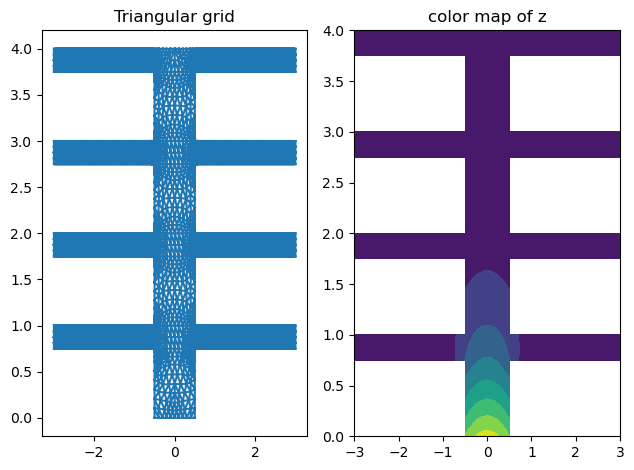

In [71]:
import numpy as np
from scipy.sparse import csc_matrix, identity
from scipy.sparse.linalg import spsolve, inv
from scipy.io import loadmat
import matplotlib.pyplot as plt

def theta_Bi(Bi):
    return np.array([1, 1, 1, 1.0, 1, Bi])

def assemblage(Bi, Aq):
    theta_Bi_values = theta_Bi(Bi)
    A = csc_matrix(Aq[0]*theta_Bi_values[0])
    for i in range(1, len(Aq)):
        A += theta_Bi_values[i] * csc_matrix(Aq[i])
    return A

# Define the function g(t_k) controlling the time integration
def g(t_k):
    return 1 - np.cos(t_k)

# Integrate the solution using the backward Euler method
def euler_backward(Bi, Delta_t, K, u_0, A, Fh, M):
    u_k = u_0
    u_k_list = [u_k]
    M_inv = inv(M)
    A = assemblage(Bi, A)
    I = identity(M.shape[0])
    S = I + Delta_t * M_inv @ csc_matrix(A)
    S_inv = inv(S)
    for k in range(1, K + 1):
        t_k = k * Delta_t
        u_k = S_inv @ (Delta_t * M_inv @ Fh * g(t_k) + u_k)
        u_k_list.append(u_k)
    return u_k_list
Solution = {}
K = 100
Delta_t = 0.1
u_0 = np.zeros(medium_Mat_mass['Mh'].shape[0])
M = medium_Mat_mass['Mh']
A = medium_Mat['Ahq']
Fh = medium_Mat['Fh']
Bi = 1
u_k_list = euler_backward(Bi, Delta_t, K, u_0, A, Fh, M)
plot(T,u_k_list[50])


I will generate the reduced basis in this part of the code. It takes a lot of time because we have many operations to perform.

In [72]:
# Generate the snapshots of the solution X_N
def generate_reduced_basis(u_0, Delta_t):
    basis = []
    for Bi in [0.01, 0.1, 1.0]:
        for k in [1, 5, 10, 20, 30]:
            u_k_list = euler_backward(Bi, Delta_t, k, u_0, medium_Mat['Ahq'], medium_Mat['Fh'], medium_Mat_mass['Mh'])
            basis.append(u_k_list[k])
    return np.array(basis).T
Z = generate_reduced_basis(u_0, Delta_t)


In this case, I implemented two methods for computing the orthogonalisation using Gram-Schmidt, and we can see the results.
First:

In [73]:
# Function to apply the orthogonalisation of Gram-Schmidt
def gram_schmidt(Z, M):
    N = Z.shape[1]
    Q = np.zeros_like(Z)
    for n in range(N):
        q = Z[:, n]
        for m in range(n):
            q -= (Q[:, m].T @ M @ Z[:, n]) * Q[:, m]
        q_norm = np.sqrt(q.T @ M @ q)
        Q[:, n] = q / q_norm
    return Q
Z_orth = gram_schmidt(Z, assemblage(1, medium_Mat['Ahq']))
# print(Z_orth.T @ assemblage(1, medium_Mat['Ahq']) @ Z_orth)

I implemented a backward Euler method for the reduced basis solution and plotted an example.

In [74]:
# Integrate the solution using the reduced basis approximation
def reduced_basis_euler_backward(Bi, Delta_t, K, Z, A, Fh, M):
    u_N_k = np.zeros(Z.shape[1])
    u_N_k_list = [u_N_k]
    M_N = Z.T @ M @ Z
    M_N_inv = np.linalg.inv(M_N)
    I = identity(M.shape[0])
    I_N = Z.T @ I @ Z
    A = assemblage(Bi, A).tocsc()
    A_N = Z.T @ A @ Z
    Fh_N = Z.T @ Fh
    S_N = I_N + Delta_t * M_N_inv @ A_N
    S_N_inv = np.linalg.inv(S_N)
    # Project all matrix in the reduced basis
    for k in range(1, K + 1):
        t_k = k * Delta_t
        u_N_k = S_N_inv @ (Delta_t * M_N_inv @ (Fh_N * g(t_k)) + u_N_k)
        u_N_k_list.append(u_N_k)
    return u_N_k_list
# Compute the reduced basis solution for Bi = 0.1
u_N_k_list = reduced_basis_euler_backward(0.1, Delta_t, K, Z_orth, medium_Mat['Ahq'], medium_Mat['Fh'], medium_Mat_mass['Mh'])

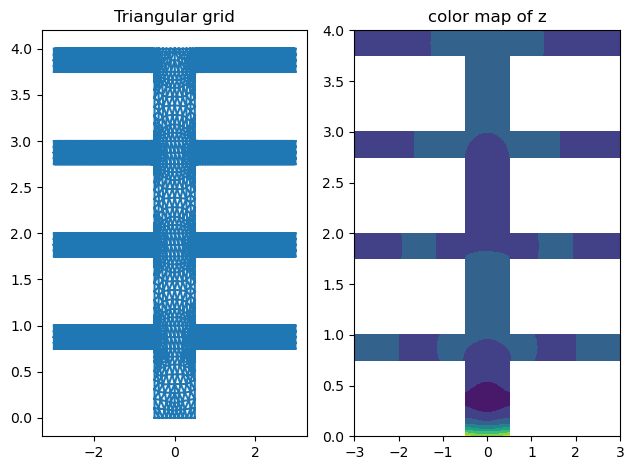

In [75]:
plot(T,Z_orth @ u_N_k_list[-1])

#### 2. Plot the outputs $ s_k(\mu) $, $ s_k^N(\mu) $, and the error $ s_k(\mu) - s_k^N(\mu) $ as a function of time for $ g(t_k) = 1 - \cos(t_k) $ and $ \mu = 0.05 $.


In [76]:
# Définir une valeur pour Bi
Bi = 0.05
# Calculer la solution de la base réduite pour un Bi donné
u_N_k_list = reduced_basis_euler_backward(Bi, Delta_t, K, Z_orth, medium_Mat['Ahq'], medium_Mat['Fh'], medium_Mat_mass['Mh'])
u_k_list = euler_backward(Bi, Delta_t, K, u_0, medium_Mat['Ahq'], medium_Mat['Fh'], medium_Mat_mass['Mh'])

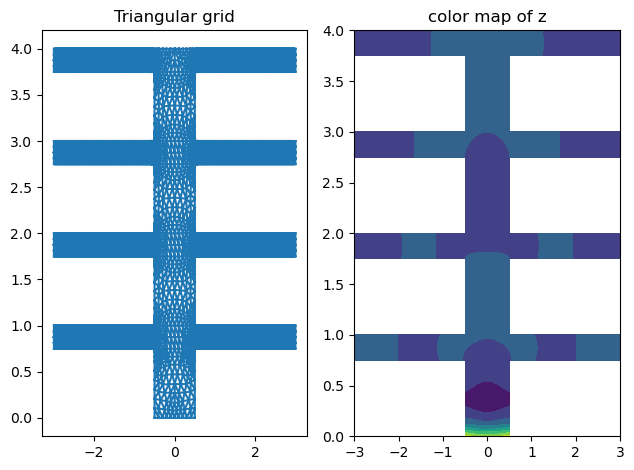

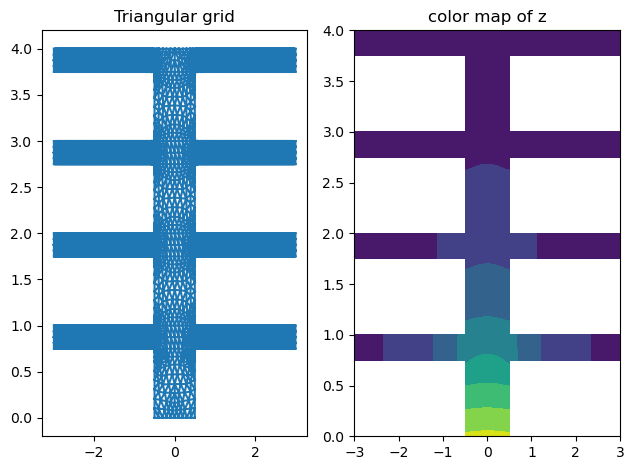

In [77]:
plot(T,Z_orth @ u_N_k_list[-1])
plot(T,u_k_list[-1])

#### 3. Plot $ ||| u_k(\mu) ||| $, $ ||| u_k^N(\mu) ||| $, and the error $ ||| u_k(\mu) - u_k^N(\mu) ||| $ as a function of time for $ g(t_k) = 1 - \cos(t_k) $ and $ \mu = 0.05 $.

In [78]:
# Calculer la sortie d'intérêt pour la solution de la base réduite
U = Z.T @ medium_Mat['Fh']
s_N_k = np.array([ U.T @ u_N_k for u_N_k in u_N_k_list])
s_k = np.array([ medium_Mat['Fh'].T @ u_k for u_k in u_k_list])

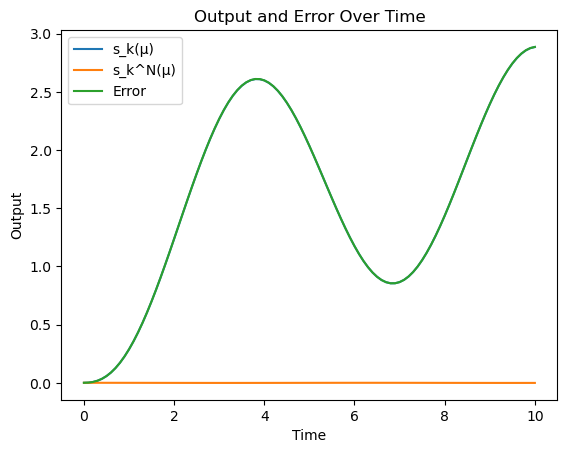

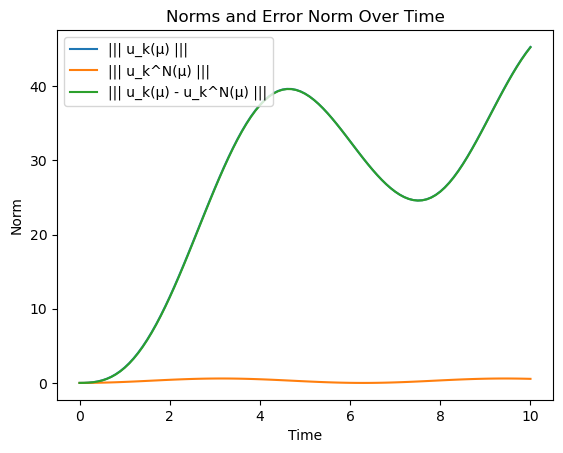

In [79]:
# Définir les paramètres
t_f = 10.0
Delta_t = 0.1
K = int(t_f / Delta_t)
times = np.linspace(0, t_f, K + 1)
# Calculer l'erreur
error_s_k = [s - s_N for s, s_N in zip(s_k, s_N_k)]

# Tracer les résultats
plt.figure()
plt.plot(times, s_k, label='s_k(μ)')
plt.plot(times, s_N_k, label='s_k^N(μ)')
plt.plot(times, error_s_k, label='Error')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Output and Error Over Time')
plt.legend()
plt.show()

# Calculer les normes
norm_u_k = [np.linalg.norm(u_k) for u_k in u_k_list]
norm_u_N_k = [np.linalg.norm(u_N_k) for u_N_k in u_N_k_list]
error_norm_u_k = [np.linalg.norm(u_k - Z_orth @ u_N_k) for u_k, u_N_k in zip(u_k_list, u_N_k_list)]

# Tracer les normes
plt.figure()
plt.plot(times, norm_u_k, label='||| u_k(μ) |||')
plt.plot(times, norm_u_N_k, label='||| u_k^N(μ) |||')
plt.plot(times, error_norm_u_k, label='||| u_k(μ) - u_k^N(μ) |||')
plt.xlabel('Time')
plt.ylabel('Norm')
plt.title('Norms and Error Norm Over Time')
plt.legend()
plt.show()

The second i use the $qr$ method of python :

In [80]:
def gramshmid(Z):
    q, r = np.linalg.qr(Z)
    return q
L_orth = gramshmid(Z)

In [81]:
# Définir une valeur pour Bi
Bi = 0.05
K = 100
# Calculer la solution de la base réduite pour un Bi donné
u_N_k_list = reduced_basis_euler_backward(Bi, Delta_t, K, L_orth, medium_Mat['Ahq'], medium_Mat['Fh'], medium_Mat_mass['Mh'])
u_k_list = euler_backward(Bi, Delta_t, K, u_0, medium_Mat['Ahq'], medium_Mat['Fh'], medium_Mat_mass['Mh'])

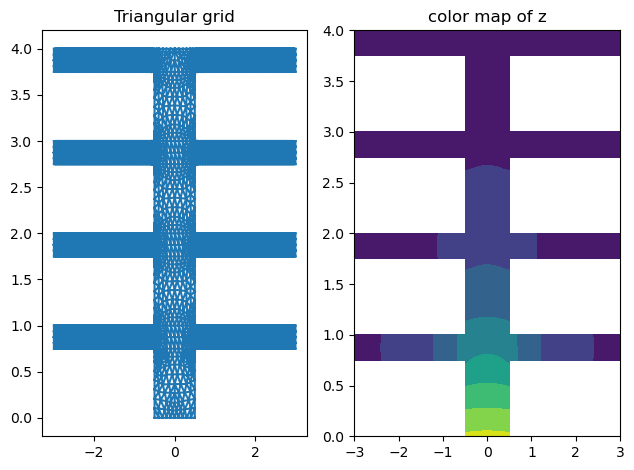

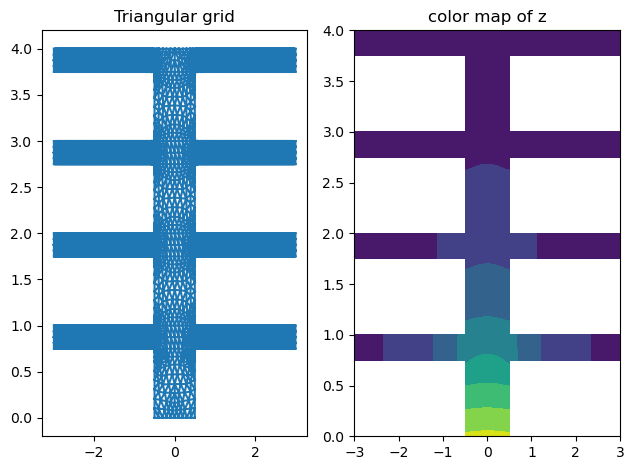

In [82]:
plot(T,L_orth @ u_N_k_list[-1])
plot(T,u_k_list[-1])

In [83]:
s_k = np.array([ medium_Mat['Fh'].T @ u_k for u_k in u_k_list])
s_N_k = np.array([ medium_Mat['Fh'].T @ L_orth @ u_N_k for u_N_k in u_N_k_list])

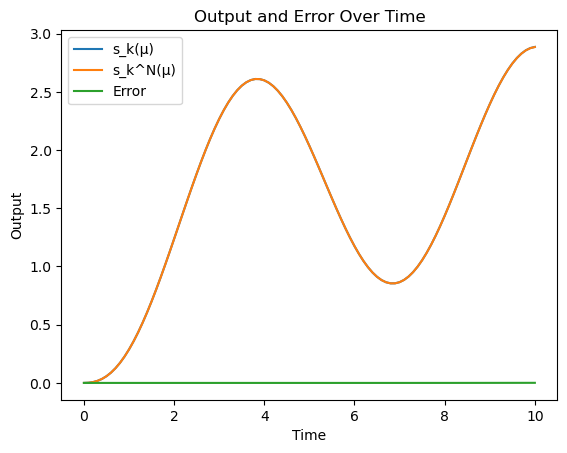

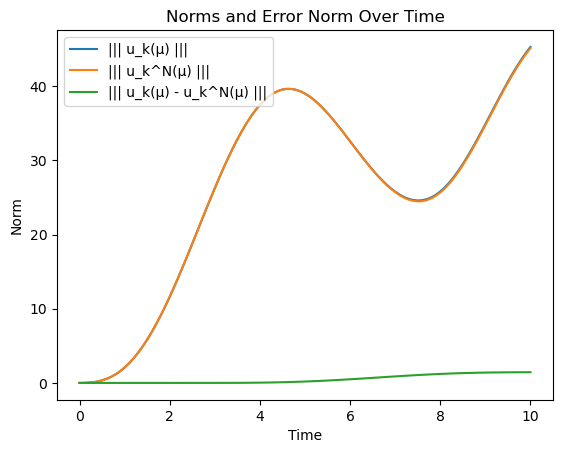

In [84]:
# Définir les paramètres
t_f = 10.0
Delta_t = 0.1
K = int(t_f / Delta_t)
times = np.linspace(0, t_f, K + 1)
# Calculer l'erreur
error_s_k = [s - s_N for s, s_N in zip(s_k, s_N_k)]

# Tracer les résultats
plt.figure()
plt.plot(times, s_k, label='s_k(μ)')
plt.plot(times, s_N_k, label='s_k^N(μ)')
plt.plot(times, error_s_k, label='Error')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Output and Error Over Time')
plt.legend()
plt.show()

# Calculer les normes
norm_u_k = [np.linalg.norm(u_k) for u_k in u_k_list]
norm_u_N_k = [np.linalg.norm(u_N_k) for u_N_k in u_N_k_list]
error_norm_u_k = [np.linalg.norm(u_k - L_orth @ u_N_k) for u_k, u_N_k in zip(u_k_list, u_N_k_list)]

# Tracer les normes
plt.figure()
plt.plot(times, norm_u_k, label='||| u_k(μ) |||')
plt.plot(times, norm_u_N_k, label='||| u_k^N(μ) |||')
plt.plot(times, error_norm_u_k, label='||| u_k(μ) - u_k^N(μ) |||')
plt.xlabel('Time')
plt.ylabel('Norm')
plt.title('Norms and Error Norm Over Time')
plt.legend()
plt.show()

I know there is an error in my code, but I haven't been able to find it. Here is the result obtained in this case. In the first method, when we compute Gram-Schmidt orthogonalisation, the error is graded but the solution is not really the same. For the other method, it gives a good approximation in terms of the plot and in terme of errors

## 4.3 Part 2 - A Posteriori Error Estimation

The problem statement fits in the framework introduced in the lecture.

### Tasks

1. Derive and implement an offline-online version for the direct calculation (no offline/online calculation) of the energy norm a posteriori error bound for the primal variable by extending your code from the elliptic case.
2. Compute the direct calculation of the error bound for 10 random parameter values in $ D $. You can perform this over time (better) or compare the values at the final time.



## 4.4 Part 3 - Sampling Procedure

Our reduced basis space from Part 1 is less than optimal. Given your offline-online decomposition for the reduced basis approximation from Part 1 and associated a posteriori error estimation from Part 2, we can now pick a much more optimal basis.

### Tasks

1. Apply the POD-Greedy algorithm with $ \Xi_{\text{train}} = G^{\ln}[0.01, 1; 100] $, $ \epsilon_{\text{tol}, \min} = 1e^{-6} $, and $ \mu^*_0 = 0.01 $. Use the impulse input $ g(t_k) = \delta_{1k}, \, 1 \leq k \leq 100 $.
2. Determine $ N_{\text{max}} $ to achieve the desired accuracy.
3. Plot $ \Delta_{\text{max}, N} = \frac{\Delta_{K, N}(\mu^*)}{||| u_k(\mu^*) |||} $ as a function of $ N $.
4. Plot the outputs $ s_k(\mu) $, $ s_k^N(\mu) $, and the simple error bound $ \Delta s_N(t_k; \mu) $.